URL to the Dataset : https://github.com/fivethirtyeight/data/blob/master/sleeping-alone-data/sleeping-alone-data.csv

In [ ]:
# place here all packages used

from google.colab import files # remember to download the dataset csv to your desktop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

import statsmodels.api as sm
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

# saving images to your mydrive
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive' 
# plt.savefig(f"{images_dir}/__name__.png")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [ ]:
uploaded = files.upload()

Saving sleeping-alone-data.csv to sleeping-alone-data.csv


##PRE-PROCESSING


In [ ]:
SAD = open("sleeping-alone-data.csv","r",encoding="latin-1")

df = pd.read_csv(SAD)
df.head()

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:ë_""our sex life has improved as a result of sleeping in separate beds.""ë_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,...,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 31 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   StartDate                                                                                                                                            1093 non-null   object
 1   EndDate                                                                                                                                              1093 non-null   object
 2   Which of the following best describes your current relationship status?                                                                              1094 non-null   object
 3   How

RENAMING COLUMNS

In [ ]:
headers = list(df.columns) # a list of the current header
headers

['StartDate',
 'EndDate',
 'Which of the following best describes your current relationship status?',
 'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
 'When both you and your partner are at home, how often do you sleep in separate beds?',
 "When you're not sleeping in the same bed as your partner, where do you typically sleep?",
 'Unnamed: 6',
 "When you're not sleeping in the same bed, where does your partner typically sleep?",
 'Unnamed: 8',
 'What are the reasons that you sleep in separate beds? Please select all that apply.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'When was the first time you slept in separate beds?',
 'To what extent do you agree with the following statement: "sleeping in separate beds helps us to stay together."',
 'To what extent do you agr

In [ ]:
new_headers = [header.replace('"','') for header in headers]
new_headers

['StartDate',
 'EndDate',
 'Which of the following best describes your current relationship status?',
 'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
 'When both you and your partner are at home, how often do you sleep in separate beds?',
 "When you're not sleeping in the same bed as your partner, where do you typically sleep?",
 'Unnamed: 6',
 "When you're not sleeping in the same bed, where does your partner typically sleep?",
 'Unnamed: 8',
 'What are the reasons that you sleep in separate beds? Please select all that apply.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'When was the first time you slept in separate beds?',
 'To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.',
 'To what extent do you agree

In [ ]:
# df.columns = new_headers
# df2 = df.copy()
df2 = df.set_axis(new_headers, axis=1, inplace=False)

In [ ]:
df2.rename(columns={"To what extent do you agree with the following statement:ë_our sex life has improved as a result of sleeping in separate beds.ë_":"To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."}, inplace=True)

In [ ]:
df2.columns

Index(['StartDate', 'EndDate',
       'Which of the following best describes your current relationship status?',
       'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       'When both you and your partner are at home, how often do you sleep in separate beds?',
       'When you're not sleeping in the same bed as your partner, where do you typically sleep?',
       'Unnamed: 6',
       'When you're not sleeping in the same bed, where does your partner typically sleep?',
       'Unnamed: 8',
       'What are the reasons that you sleep in separate beds? Please select all that apply.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19',
       'When was the first time you slept in separate beds?',
       'To what extent do you agree with the following statement: sleeping

REMOVING COLUMNS & ROWS

In [ ]:
df2 = df2.drop(columns = ["StartDate","EndDate","When you're not sleeping in the same bed as your partner, where do you typically sleep?","Unnamed: 6","When you're not sleeping in the same bed, where does your partner typically sleep?","Unnamed: 8","Unnamed: 19","Unnamed: 25"])
df2 = df2.drop(df2.index[0]) # deleted the second useless header
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 1 to 1093
Data columns (total 23 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   Which of the following best describes your current relationship status?                                                                              1093 non-null   object
 1   How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.  1079 non-null   object
 2   When both you and your partner are at home, how often do you sleep in separate beds?                                                                 1079 non-null   object
 3   Wha

In [ ]:
df2_text = df2.copy() # for later use if we want to use the original text values

MAPPING PHASE : https://www.scribbr.com/statistics/ordinal-data/

In [ ]:
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].str.replace("Divorced", "1")
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].str.replace("In a domestic partnership or civil union", "2")
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].str.replace("Married", "3")
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].str.replace("Separated", "4")
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].str.replace("Single, but cohabiting with a significant other", "5")
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].str.replace("Widowed", "6")
df2["Which of the following best describes your current relationship status?"] = df2["Which of the following best describes your current relationship status?"].fillna(value = 0)

In [ ]:
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].str.replace("Less than 1 year", "1")
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].str.replace("1-5 years", "2")
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].str.replace("6-10 years", "3")
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].str.replace("11-15 years", "4")
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].str.replace("16-20 years", "5")
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].str.replace("More than 20 years", "6")
df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."] = df2["How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship."].fillna(value = 0)

In [ ]:
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].str.replace("Never", "1")
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].str.replace("Once a year or less", "2")
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].str.replace("Once a month or less", "3")
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].str.replace("A few times per month", "4")
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].str.replace("A few times per week", "5")
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].str.replace("Every night", "6")
df2["When both you and your partner are at home, how often do you sleep in separate beds?"] = df2["When both you and your partner are at home, how often do you sleep in separate beds?"].fillna(value = 0)

In [ ]:
df2["What are the reasons that you sleep in separate beds? Please select all that apply."] = df2["What are the reasons that you sleep in separate beds? Please select all that apply."].str.replace("One of us snores", "1")
df2["What are the reasons that you sleep in separate beds? Please select all that apply."] = df2["What are the reasons that you sleep in separate beds? Please select all that apply."].fillna(value = 0)

df2["Unnamed: 10"] =  df2["Unnamed: 10"].str.replace("One of us makes frequent bathroom trips in the night", "1")
df2["Unnamed: 10"] = df2["Unnamed: 10"].fillna(value = 0)

df2["Unnamed: 11"] =  df2["Unnamed: 11"].str.replace("One of us is sick", "1")
df2["Unnamed: 11"] = df2["Unnamed: 11"].fillna(value = 0)

df2["Unnamed: 12"] =  df2["Unnamed: 12"].str.replace("We are no longer physically intimate", "1")
df2["Unnamed: 12"] = df2["Unnamed: 12"].fillna(value = 0)

df2["Unnamed: 13"] =  df2["Unnamed: 13"].str.replace("We have different temperature preferences for the room", "1")
df2["Unnamed: 13"] = df2["Unnamed: 13"].fillna(value = 0)

df2["Unnamed: 14"] =  df2["Unnamed: 14"].str.replace("We've had an argument or fight", "1")
df2["Unnamed: 14"] = df2["Unnamed: 14"].fillna(value = 0)

df2["Unnamed: 15"] =  df2["Unnamed: 15"].str.replace("Not enough space", "1")
df2["Unnamed: 15"] = df2["Unnamed: 15"].fillna(value = 0)

df2["Unnamed: 16"] =  df2["Unnamed: 16"].str.replace("Do not want to share the covers", "1")
df2["Unnamed: 16"] = df2["Unnamed: 16"].fillna(value = 0)


df2["Unnamed: 17"] =  df2["Unnamed: 17"].str.replace("One of us needs to sleep with a child", "1")
df2["Unnamed: 17"] = df2["Unnamed: 17"].fillna(value = 0)

df2["Unnamed: 18"] =  df2["Unnamed: 18"].str.replace("Night working/very different sleeping times", "1")
df2["Unnamed: 18"] = df2["Unnamed: 18"].fillna(value = 0)

In [ ]:
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].str.replace("After 20 years of our relationship", "1")
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].str.replace("Within 16-20 years of our relationship", "2")
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].str.replace("Within 11-15 years of our relationship", "3")
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].str.replace("Within 6-10 years of our relationship", "4")
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].str.replace("Within the first 1-5 years of our relationship", "5")
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].str.replace("Immediately/ We've always slept in separate beds", "6")
df2["When was the first time you slept in separate beds?"] = df2["When was the first time you slept in separate beds?"].fillna(value = 0)

In [ ]:
df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."] = df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."].str.replace("Strongly disagree", "1") 
df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."] = df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."].str.replace("Somewhat disagree", "2")
df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."] = df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."].str.replace("Neither agree nor disagree", "3") 
df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."] = df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."].str.replace("Somewhat agree", "4") 
df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."] = df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."].str.replace("Strongly agree", "5") 
df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."] = df2["To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together."].fillna(value = 0) 

In [ ]:
df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."] = df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."].str.replace("Strongly disagree", "1") 
df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."] = df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."].str.replace("Somewhat disagree", "2")
df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."] = df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."].str.replace("Neither agree nor disagree", "3") 
df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."] = df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."].str.replace("Somewhat agree", "4") 
df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."] = df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."].str.replace("Strongly agree", "5") 
df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."] = df2["To what extent do you agree with the following statement: we sleep better when we sleep in separate beds."].fillna(value = 0) 

In [ ]:
df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."] = df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."].str.replace("Strongly disagree", "1") 
df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."] = df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."].str.replace("Somewhat disagree", "2")
df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."] = df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."].str.replace("Neither agree nor disagree", "3") 
df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."] = df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."].str.replace("Somewhat agree", "4") 
df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."] = df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."].str.replace("Strongly agree", "5") 
df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."] = df2["To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds."].fillna(value = 0) 

In [ ]:
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Other (please specify)", "0", regex = False)
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Healthcare Support Occupations", "1")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Legal Occupations", "2")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Life, Physical, and Social Science Occupations", "3")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Office and Administrative Support Occupations", "4")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Arts, Design, Entertainment, Sports, and Media Occupations", "5")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Healthcare Practitioners and Technical Occupations", "6")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Building and Grounds Cleaning and Maintenance Occupations", "7")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Protective Service Occupations", "8")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Business and Financial Operations Occupations", "9")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Installation, Maintenance, and Repair Occupations", "10")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Education, Training, and Library Occupations", "11")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Construction and Extraction Occupations", "12")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Sales and Related Occupations", "13")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Computer and Mathematical Occupations", "14")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Transportation and Materials Moving Occupations", "15")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Architecture and Engineering Occupations", "16")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Food Preparation and Serving Related Occupations", "17")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Farming, Fishing, and Forestry Occupations", "18")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Management Occupations", "19")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Production Occupations", "20")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Community and Social Service Occupations", "21")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].str.replace("Personal Care and Service Occupations", "22")
df2["Which of the following best describes your current occupation?"] = df2["Which of the following best describes your current occupation?"].fillna(value = 0)

In [ ]:
df2["Gender"] = df2["Gender"].str.replace("Male", "1")
df2["Gender"] = df2["Gender"].str.replace("Female", "2")
df2["Gender"] = df2["Gender"].fillna(value = 0)

In [ ]:
df2["Age"] = df2["Age"].str.replace("18-29", "1")
df2["Age"] = df2["Age"].str.replace("30-44", "2")
df2["Age"] = df2["Age"].str.replace("45-60", "3")
df2["Age"] = df2["Age"].str.replace("> 60", "4")
df2["Age"] = df2["Age"].fillna(value = 0)

In [ ]:
df2["Household Income"] = df2["Household Income"].str.replace("$0 - $24,999", "1", regex= False)
df2["Household Income"] = df2["Household Income"].str.replace("$25,000 - $49,999", "2", regex = False)
df2["Household Income"] = df2["Household Income"].str.replace("$50,000 - $99,999", "3", regex = False)
df2["Household Income"] = df2["Household Income"].str.replace("$100,000 - $149,999", "4", regex = False)
df2["Household Income"] = df2["Household Income"].str.replace("$150,000+", "5", regex = False)
df2["Household Income"] = df2["Household Income"].fillna(value = 0)

In [ ]:
df2["Education"] = df2["Education"].str.replace("Less than high school degree", "1")
df2["Education"] = df2["Education"].str.replace("High school degree", "2")
df2["Education"] = df2["Education"].str.replace("Some college or Associate degree", "3")
df2["Education"] = df2["Education"].str.replace("Bachelor degree", "4")
df2["Education"] = df2["Education"].str.replace("Graduate degree", "5")
df2["Education"] = df2["Education"].fillna(value = 0)

In [ ]:
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("East North Central", "1")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("East South Central", "2")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("Middle Atlantic", "3")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("Mountain", "4")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("New England", "5")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("Pacific", "6")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("South Atlantic", "7")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("West North Central", "8")
df2["Location (Census Region)"] = df2["Location (Census Region)"].str.replace("West South Central", "9")
df2["Location (Census Region)"] = df2["Location (Census Region)"].fillna(value = 0)

In [ ]:
# categorical values = object
# continuous values = integers

try: 
  for x in df2.columns:
    df2[x] = pd.to_numeric(df2[x])
except:
  pass

In [ ]:
# to check if mapped corrected
for x in df2.columns:
  print("{}: {} \n".format(x, df2[x].unique())) # change the column name

Which of the following best describes your current relationship status?: [5 3 2 6 4 1] 

How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.: [2 1 6 3 5 4 0] 

When both you and your partner are at home, how often do you sleep in separate beds?: [2 4 1 6 3 5 0] 

What are the reasons that you sleep in separate beds? Please select all that apply.: [0 1] 

Unnamed: 10: [0 1] 

Unnamed: 11: [1 0] 

Unnamed: 12: [0 1] 

Unnamed: 13: [0 1] 

Unnamed: 14: [0 1] 

Unnamed: 15: [0 1] 

Unnamed: 16: [0 1] 

Unnamed: 17: [0 1] 

Unnamed: 18: [0 1] 

When was the first time you slept in separate beds?: [5 6 0 4 3 1 2] 

To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.: [1 4 0 3 5 2] 

To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.: [4 5 0 3 2 1] 

To what extent do you agree with the

CHECKING OUTLIERS

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 1 to 1093
Data columns (total 23 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype
---  ------                                                                                                                                               --------------  -----
 0   Which of the following best describes your current relationship status?                                                                              1093 non-null   int64
 1   How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.  1093 non-null   int64
 2   When both you and your partner are at home, how often do you sleep in separate beds?                                                                 1093 non-null   int64
 3   What are

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

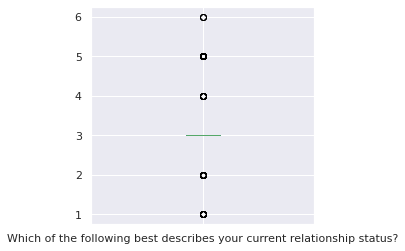

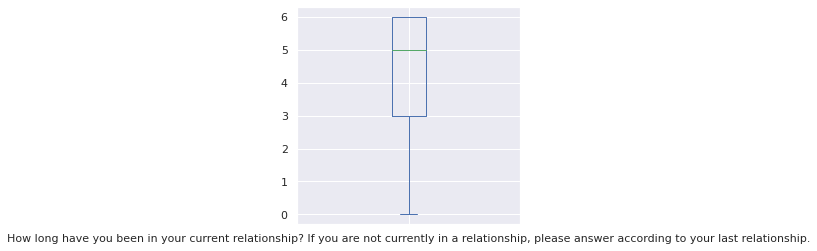

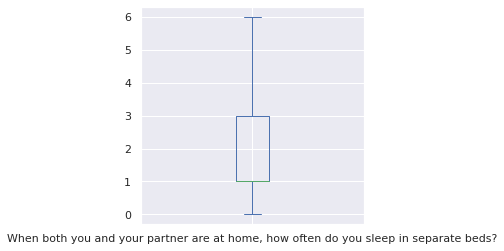

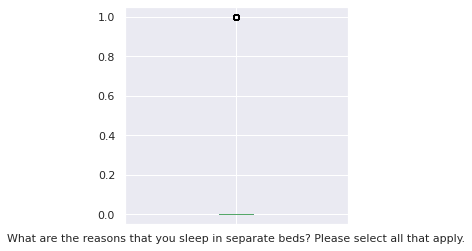

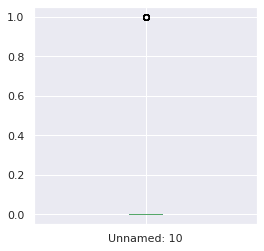

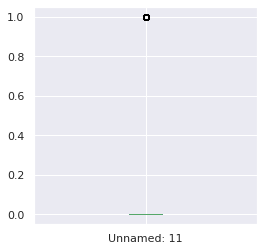

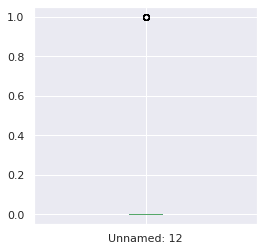

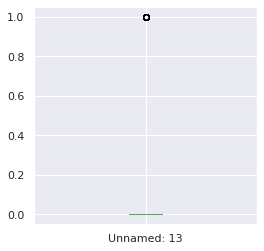

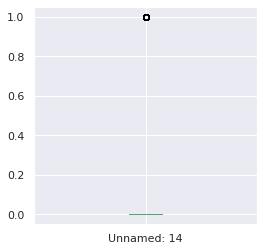

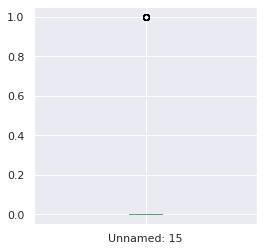

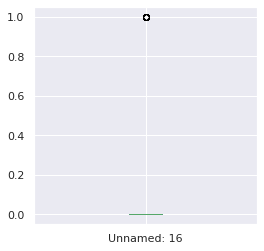

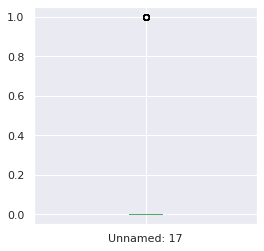

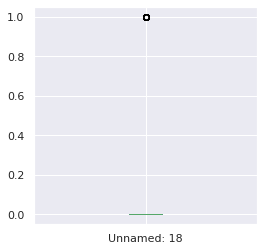

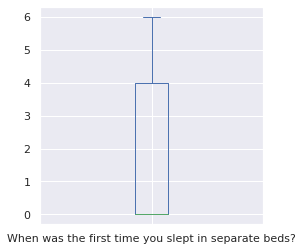

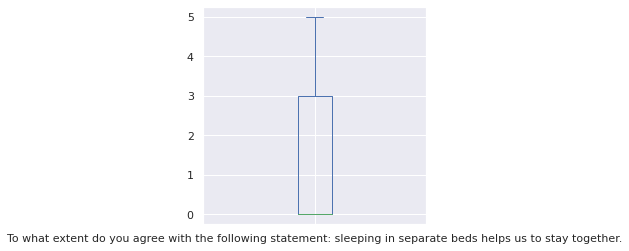

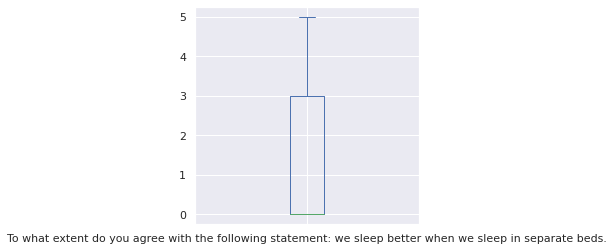

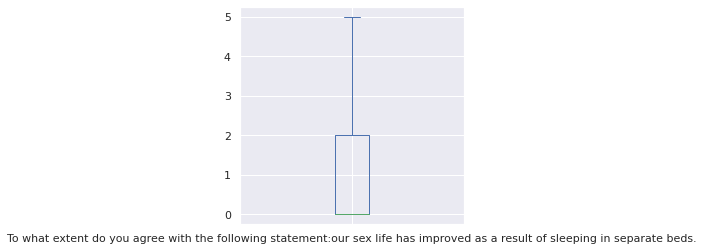

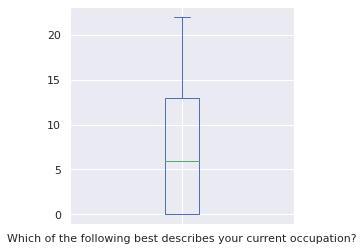

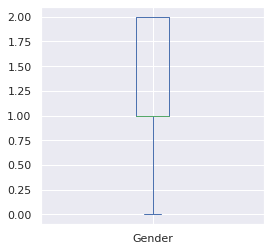

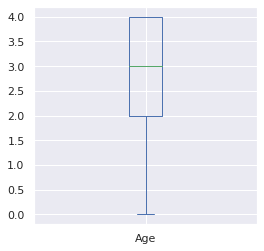

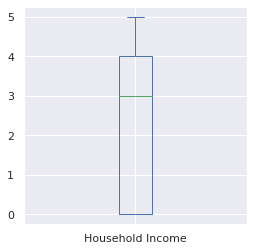

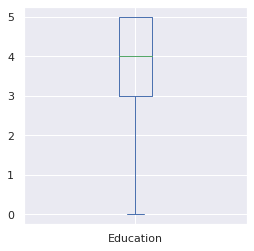

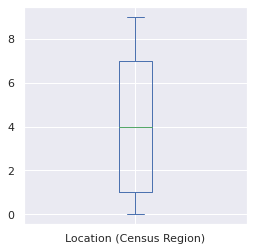

In [ ]:
for x in df2.columns:
  fig, ax = plt.subplots(1, figsize = (4, 4))
  df2[x].plot.box(ax = ax)
  
plt.show() # results: no unreasonable outliers

In [ ]:
df_clean = df2.drop(columns = ["What are the reasons that you sleep in separate beds? Please select all that apply.","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"]) # cleaned up data with more columns to remove
df_clean

,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?",When was the first time you slept in separate beds?,To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.,To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.,To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.,Which of the following best describes your current occupation?,Gender,Age,Household Income,Education,Location (Census Region)
1,5,2,2,5,1,4,1,0,1,1,1,3,6
2,5,2,4,6,4,5,1,1,1,1,0,4,7
3,3,2,1,0,0,0,0,2,1,1,5,5,7
4,3,2,1,0,0,0,0,3,1,1,2,4,3
5,3,2,1,0,0,0,0,4,1,1,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,3,1,2,5,3,3,3,5,2,2,0,4,7
1090,3,6,6,1,3,3,3,0,1,4,0,2,1
1091,3,2,1,0,0,0,0,19,1,2,5,4,3
1092,4,5,1,0,0,0,0,5,1,4,3,3,5


##PROJECT TASKS:


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 1 to 1093
Data columns (total 13 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype
---  ------                                                                                                                                               --------------  -----
 0   Which of the following best describes your current relationship status?                                                                              1093 non-null   int64
 1   How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.  1093 non-null   int64
 2   When both you and your partner are at home, how often do you sleep in separate beds?                                                                 1093 non-null   int64
 3   When was

##1. Time Series Plots of Y for X

In [ ]:
div_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/divorce.csv")
div_df

,Unnamed: 0,year,date,all_3544,HS_3544,SC_3544,BAp_3544,BAo_3544,GD_3544,poor_3544,...,rich_3544,all_4554,HS_4554,SC_4554,BAp_4554,BAo_4554,GD_4554,poor_4554,mid_4554,rich_4554
0,1,1960,1960-01-01,0.034445,0.034889,0.033669,0.027513,0.027513,NaN,0.071951,...,0.022562,0.039651,0.040071,0.038703,0.031886,0.031886,NaN,0.075373,0.029337,0.023505
1,2,1970,1970-01-01,0.049256,0.050000,0.048705,0.041259,0.041259,NaN,0.113736,...,0.021927,0.050626,0.050566,0.051473,0.048311,0.048311,NaN,0.112496,0.033869,0.021233
2,3,1980,1980-01-01,0.106005,0.104151,0.112699,0.097772,0.097772,NaN,0.241647,...,0.035015,0.088185,0.085664,0.095009,0.091035,0.091035,NaN,0.198673,0.063009,0.027916
3,4,1990,1990-01-01,0.150805,0.159381,0.169670,0.114955,0.118534,0.109145,0.326948,...,0.049725,0.145726,0.140779,0.166331,0.134370,0.135661,0.132741,0.306614,0.114981,0.045775
4,5,2000,2000-01-01,0.156841,0.175446,0.173803,0.105618,0.110540,0.095903,0.343089,...,0.049395,0.179581,0.184777,0.201104,0.149042,0.153693,0.142550,0.382135,0.142242,0.051525
5,6,2001,2001-01-01,0.157306,0.174116,0.178169,0.107039,0.111861,0.097197,0.342836,...,0.040574,0.182651,0.190237,0.205737,0.148632,0.153269,0.141745,0.390039,0.146513,0.045222
6,7,2002,2002-01-01,0.156508,0.174769,0.179294,0.103442,0.109690,0.090763,0.341088,...,0.038796,0.180650,0.192090,0.198048,0.146439,0.152888,0.136777,0.383795,0.146242,0.046089
7,8,2003,2003-01-01,0.153844,0.172545,0.176975,0.102550,0.110683,0.086385,0.333105,...,0.039262,0.184698,0.194891,0.206792,0.147350,0.151223,0.141439,0.391315,0.151240,0.042694
8,9,2004,2004-01-01,0.154841,0.177565,0.177080,0.100337,0.105990,0.089114,0.334328,...,0.036796,0.184111,0.193739,0.208312,0.145630,0.151841,0.135796,0.391199,0.150755,0.041060
9,10,2005,2005-01-01,0.152920,0.175164,0.176743,0.099481,0.107115,0.084992,0.329074,...,0.037071,0.184325,0.197213,0.205276,0.143482,0.147395,0.137305,0.389394,0.150802,0.042773


In [ ]:
years = div_df['year']
years 

All35to44 = div_df['all_3544']
Highschool35to44 = div_df['HS_3544']
SomeCollege35to44 = div_df['SC_3544']
BachelorsPlus35to44 = div_df['BAp_3544']
BachelorsOnly35to44 = div_df['BAo_3544']
GraduateDegree35to44 = div_df['GD_3544']
Poor35to44 = div_df['poor_3544']
Middle35to44 = div_df['mid_3544']
Rich35to44 = div_df['rich_3544']
All45to54 = div_df['all_4554']
Highschool45to54 = div_df['HS_4554']
SomeCollege45to54 = div_df['SC_4554']
BachelorsPlus45to54 = div_df['BAp_4554']
BachelorsOnly45to54 = div_df['BAo_4554']
GraduateDegree45to54 = div_df['GD_4554']
Poor45to54 = div_df['poor_4554']
Middle45to54 = div_df['mid_4554']
Rich45to54 = div_df['rich_4554']

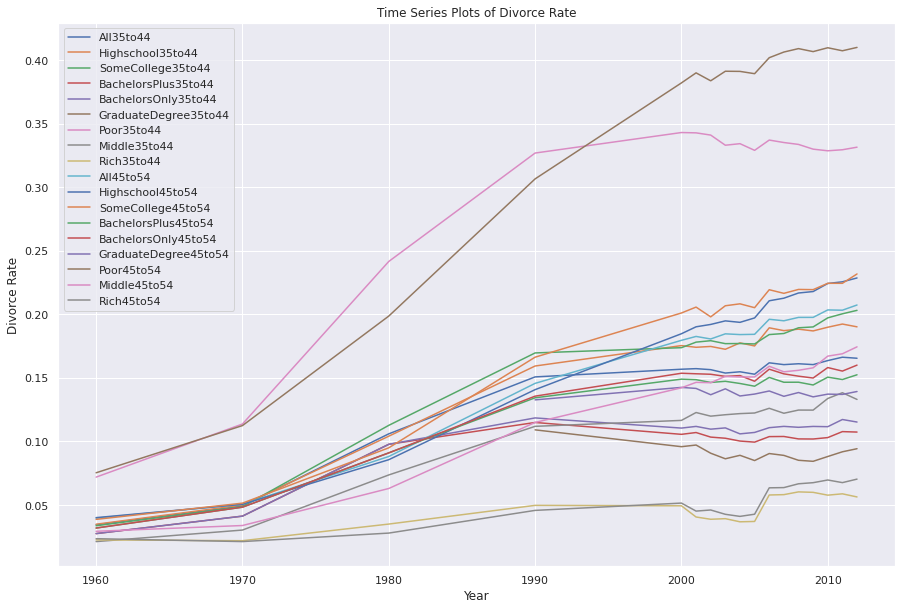

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(years, All35to44, label = "All35to44")
plt.plot(years, Highschool35to44, label = "Highschool35to44")
plt.plot(years, SomeCollege35to44, label = "SomeCollege35to44")
plt.plot(years, BachelorsPlus35to44, label = "BachelorsPlus35to44")
plt.plot(years, BachelorsOnly35to44, label = "BachelorsOnly35to44")
plt.plot(years, GraduateDegree35to44, label = "GraduateDegree35to44")
plt.plot(years, Poor35to44, label = "Poor35to44")
plt.plot(years, Middle35to44, label = "Middle35to44")
plt.plot(years, Rich35to44, label = "Rich35to44")
plt.plot(years, All45to54, label = "All45to54")
plt.plot(years, Highschool45to54, label = "Highschool45to54")
plt.plot(years, SomeCollege45to54, label = "SomeCollege45to54")
plt.plot(years, BachelorsPlus45to54, label = "BachelorsPlus45to54")
plt.plot(years, BachelorsOnly45to54, label = "BachelorsOnly45to54")
plt.plot(years, GraduateDegree45to54, label = "GraduateDegree45to54")
plt.plot(years, Poor45to54, label = "Poor45to54")
plt.plot(years, Middle45to54, label = "Middle45to54")
plt.plot(years, Rich45to54, label = "Rich45to54")
plt.title('Time Series Plots of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Divorce Rate')
plt.legend()
plt.show()


##2. Cumulative plots of Y for X

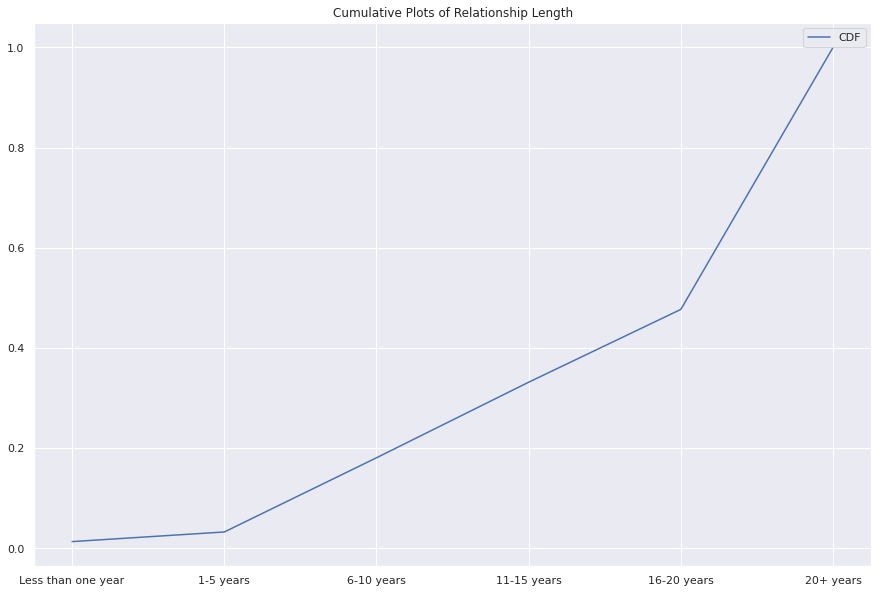

<Figure size 1080x720 with 0 Axes>

In [ ]:
#Plot histogram using df_clean data
count, bins_count = np.histogram(df_clean['How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.'], bins = 6) #6 bins for 6 categories of answers
#Finding PDF using histogram data
pdf = count/sum(count) 
#Calculate CDF
cdf = np.cumsum(pdf)
#Create appropriate labels for x-axis
rel_length = ["Less than one year", "1-5 years", "6-10 years", "11-15 years", "16-20 years", "20+ years"]
#Plot CDF
plt.figure(figsize = (15,10))
plt.plot(rel_length, cdf, label = "CDF")
plt.legend()
plt.title('Cumulative Plots of Relationship Length')
plt.figure(figsize = (15,10))
plt.show()
#Process repeated for other cumulative plots

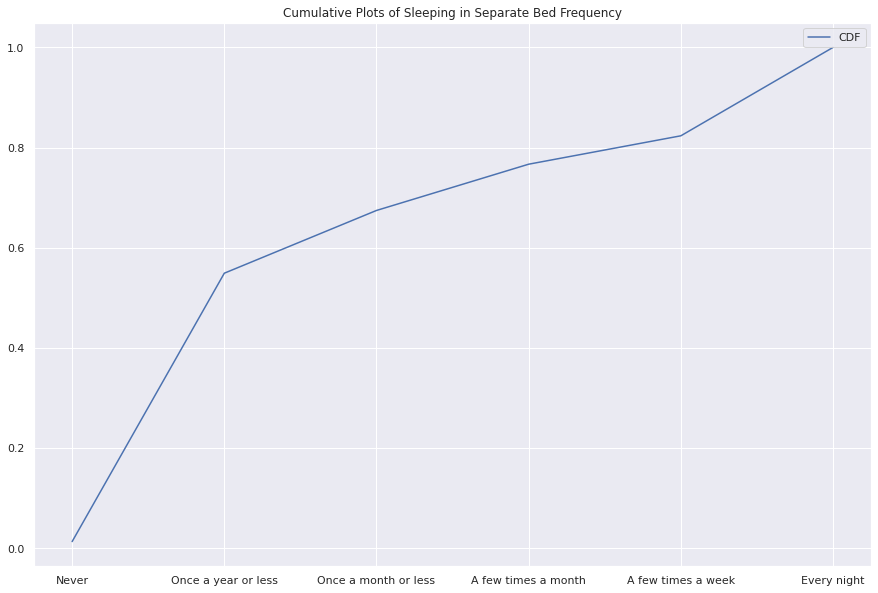

In [ ]:
count, bins_count = np.histogram(df_clean['When both you and your partner are at home, how often do you sleep in separate beds?'], bins = 6) #6 bins for 6 categories of answers
pdf = count/sum(count) 
cdf = np.cumsum(pdf)
sep_bed_freq = ["Never", "Once a year or less", "Once a month or less", "A few times a month", "A few times a week", "Every night"]
plt.figure(figsize = (15,10))
plt.plot(sep_bed_freq, cdf, label = "CDF")
plt.legend()
plt.title('Cumulative Plots of Sleeping in Separate Bed Frequency')
plt.show()

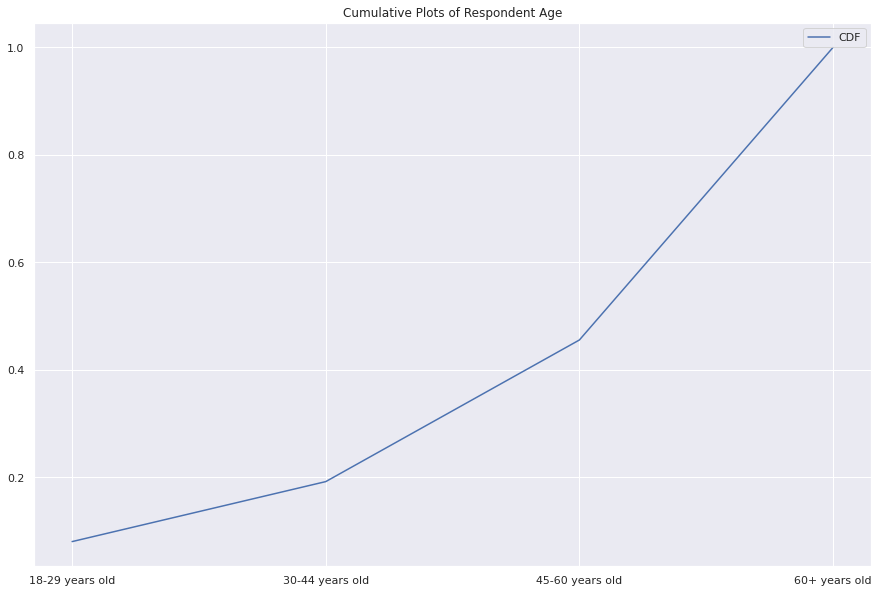

In [ ]:
count, bins_count = np.histogram(df_clean['Age'], bins = 4) #4 bins for 4 age ranges
pdf = count/sum(count) 
cdf = np.cumsum(pdf)
age_group = ["18-29 years old", "30-44 years old", "45-60 years old", "60+ years old"]
plt.figure(figsize = (15,10))
plt.plot(age_group, cdf, label = "CDF")
plt.legend()
plt.title('Cumulative Plots of Respondent Age')
plt.show()

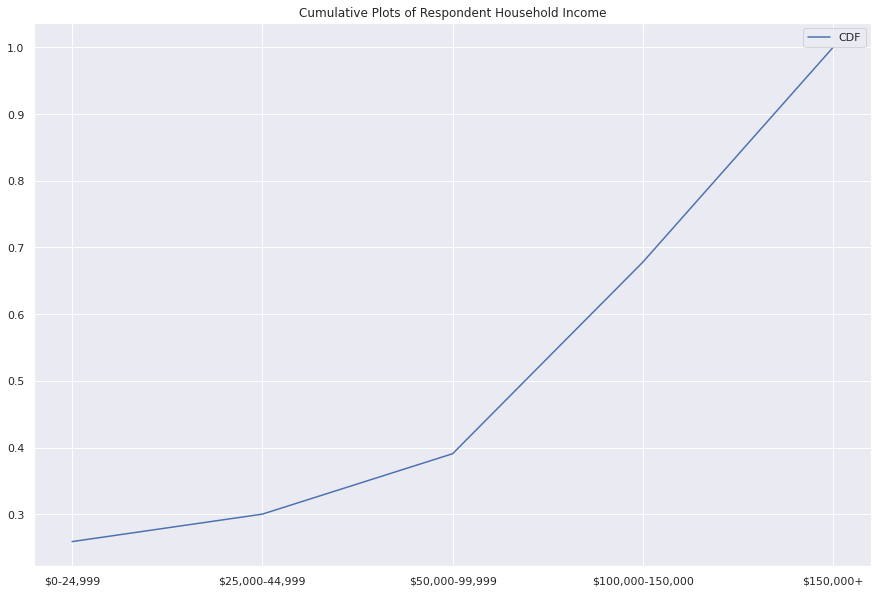

In [ ]:
count, bins_count = np.histogram(df_clean['Household Income'], bins = 5) #5 bins for 5 income brackets
pdf = count/sum(count) 
cdf = np.cumsum(pdf)
income_level = ["$0-24,999", "$25,000-44,999", "$50,000-99,999", "$100,000-150,000", "$150,000+"]
plt.figure(figsize = (15,10))
plt.plot(income_level, cdf, label = "CDF")
plt.legend()
plt.title('Cumulative Plots of Respondent Household Income')
plt.show()

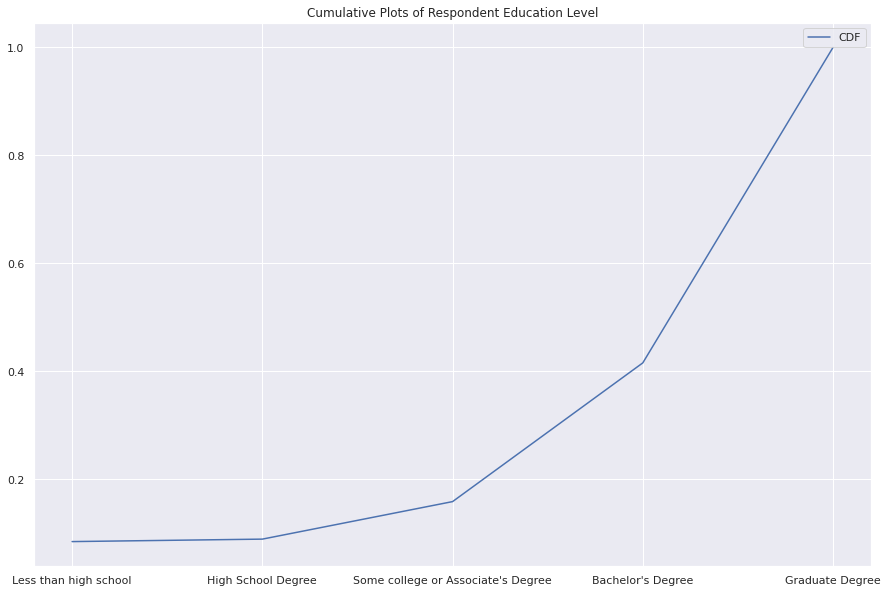

In [ ]:
count, bins_count = np.histogram(df_clean['Education'], bins = 5) 
pdf = count/sum(count) 
cdf = np.cumsum(pdf)
edu_level = ["Less than high school", "High School Degree", "Some college or Associate's Degree", "Bachelor's Degree", "Graduate Degree"]
plt.figure(figsize = (15,10))
plt.plot(edu_level, cdf, label = "CDF")
plt.legend()
plt.title('Cumulative Plots of Respondent Education Level')
plt.show()


##3. The Rate of Change of Y for X

In [ ]:
#creating new dataframes that store the rate of change in divorce rate from year to year
All35to44roc = All35to44.pct_change() 
Highschool35to44roc = Highschool35to44.pct_change() 
SomeCollege35to44roc = SomeCollege35to44.pct_change() 
BachelorsPlus35to44roc = BachelorsPlus35to44.pct_change() 
BachelorsOnly35to44roc = BachelorsOnly35to44.pct_change() 
GraduateDegree35to44roc = GraduateDegree35to44.pct_change() 
Poor35to44roc = Poor35to44.pct_change() 
Middle35to44roc = Middle35to44.pct_change() 
Rich35to44roc = Rich35to44.pct_change() 
All45to54roc = All45to54.pct_change() 
Highschool45to54roc = Highschool45to54.pct_change() 
SomeCollege45to54roc = SomeCollege45to54.pct_change() 
BachelorsPlus45to54roc = BachelorsPlus45to54.pct_change() 
BachelorsOnly45to54roc = BachelorsOnly45to54.pct_change() 
GraduateDegree45to54roc = GraduateDegree45to54.pct_change() 
Poor45to54roc = Poor45to54.pct_change() 
Middle45to54roc = Middle45to54.pct_change() 
Rich45to54roc = Rich45to54.pct_change() 

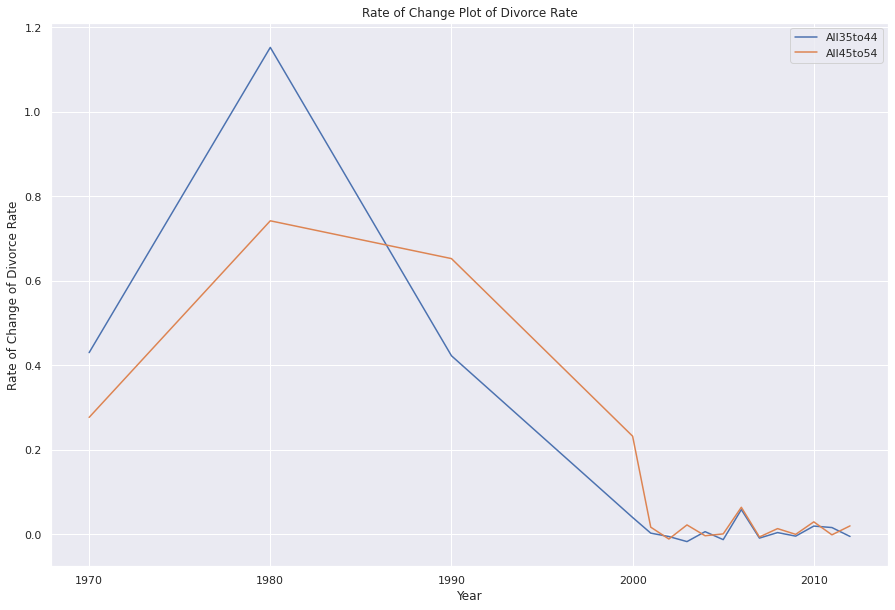

In [ ]:
#Plot for all groups, stratified by age range
plt.figure(figsize = (15,10))

plt.plot(years, All35to44roc, label = "All35to44")
plt.plot(years, All45to54roc, label = "All45to54")

plt.title('Rate of Change Plot of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Rate of Change of Divorce Rate')
plt.legend()
plt.show()

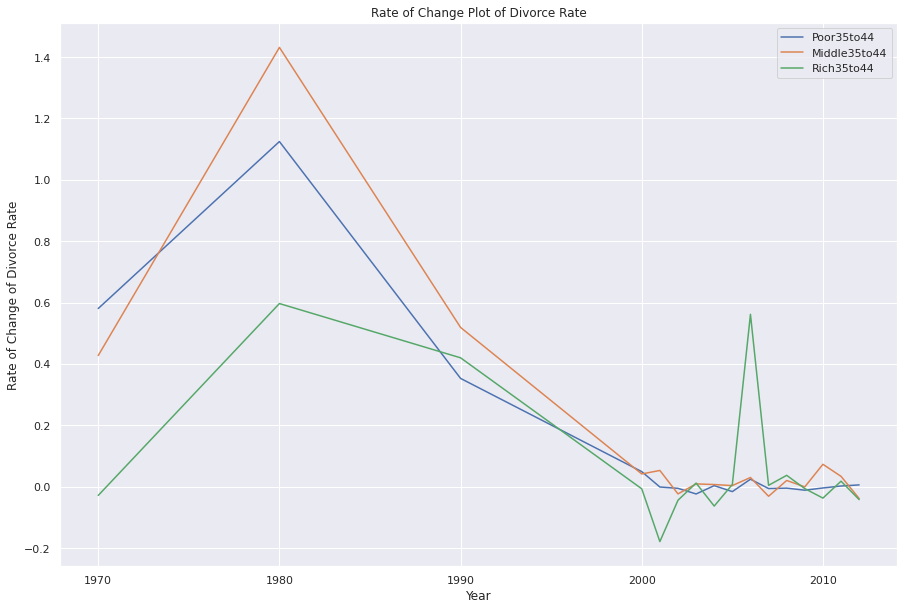

In [ ]:
#Plot for 35 to 44 year old age range, stratified by income
plt.figure(figsize = (15,10))

plt.plot(years, Poor35to44roc, label = "Poor35to44")
plt.plot(years, Middle35to44roc, label = "Middle35to44")
plt.plot(years, Rich35to44roc, label = "Rich35to44")

plt.title('Rate of Change Plot of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Rate of Change of Divorce Rate')
plt.legend()
plt.show()

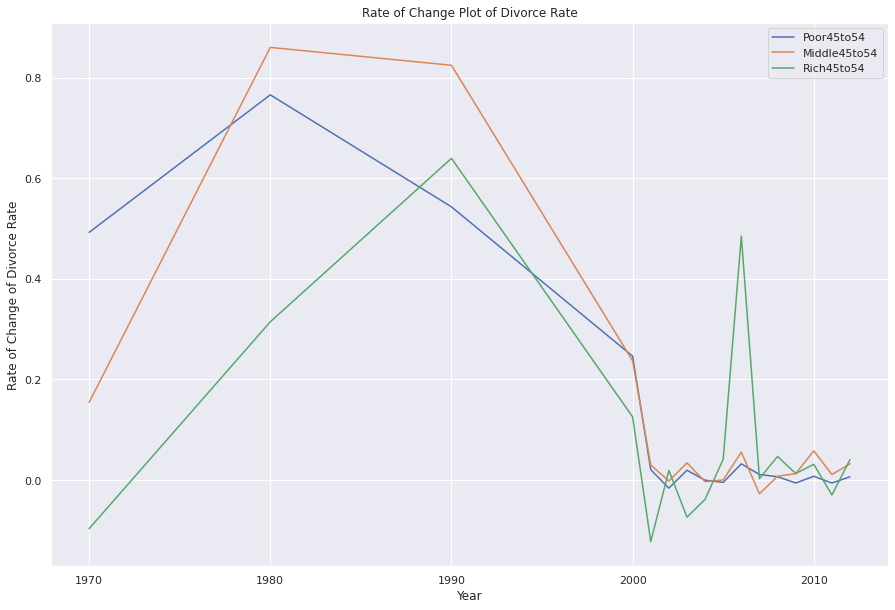

In [ ]:
#Plot for 45 to 54 year old age range, stratified by income
plt.figure(figsize = (15,10))

plt.plot(years, Poor45to54roc, label = "Poor45to54")
plt.plot(years, Middle45to54roc, label = "Middle45to54")
plt.plot(years, Rich45to54roc, label = "Rich45to54")

plt.title('Rate of Change Plot of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Rate of Change of Divorce Rate')
plt.legend()
plt.show()

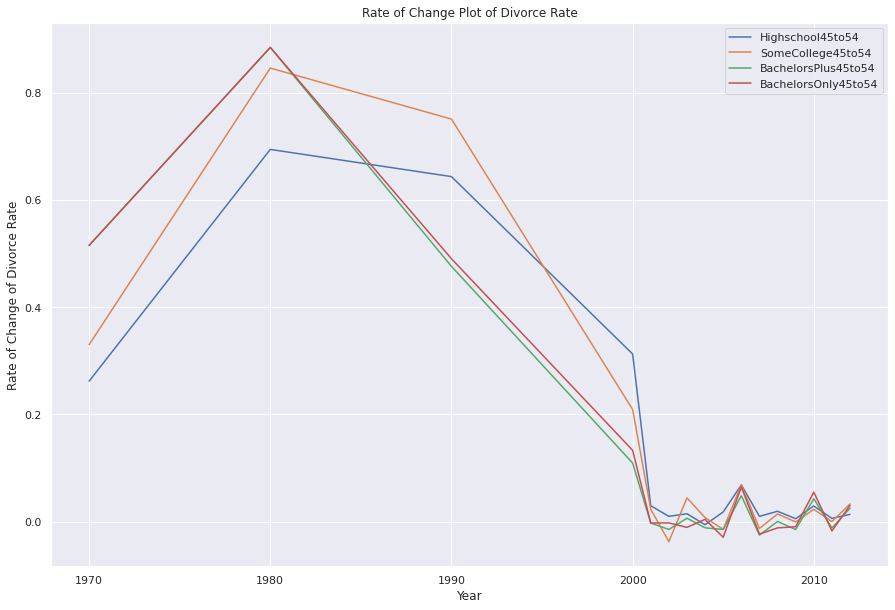

In [ ]:
#Plot for 45 to 54 year old age range, stratified by education level
plt.figure(figsize = (15,10))

plt.plot(years, Highschool45to54roc, label = "Highschool45to54")
plt.plot(years, SomeCollege45to54roc, label = "SomeCollege45to54")
plt.plot(years, BachelorsPlus45to54roc, label = "BachelorsPlus45to54")
plt.plot(years, BachelorsOnly45to54roc, label = "BachelorsOnly45to54")

plt.title('Rate of Change Plot of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Rate of Change of Divorce Rate')
plt.legend()
plt.show()

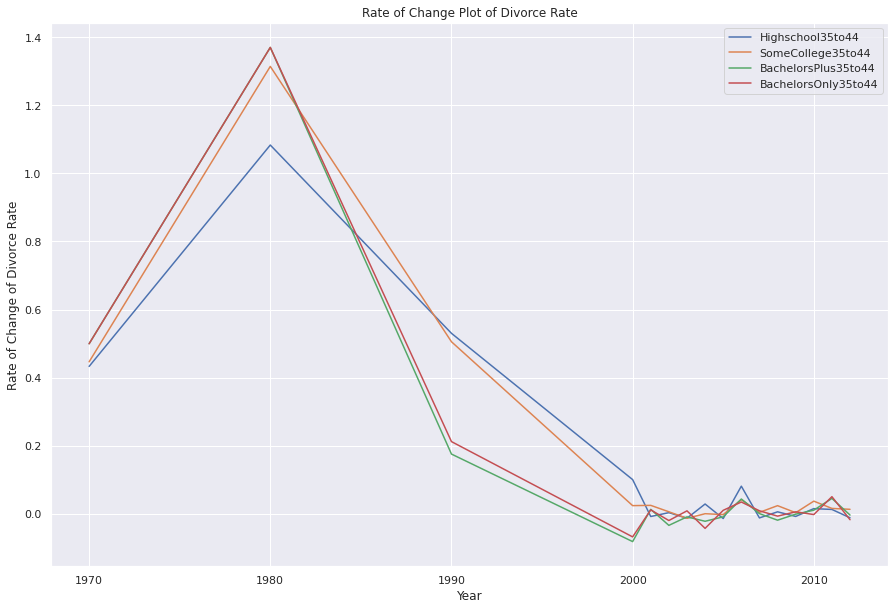

In [ ]:
#Plot for 35 to 44 year old age range, stratified by education level
plt.figure(figsize = (15,10))

plt.plot(years, Highschool35to44roc, label = "Highschool35to44")
plt.plot(years, SomeCollege35to44roc, label = "SomeCollege35to44")
plt.plot(years, BachelorsPlus35to44roc, label = "BachelorsPlus35to44")
plt.plot(years, BachelorsOnly35to44roc, label = "BachelorsOnly35to44")

plt.title('Rate of Change Plot of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Rate of Change of Divorce Rate')
plt.legend()
plt.show()

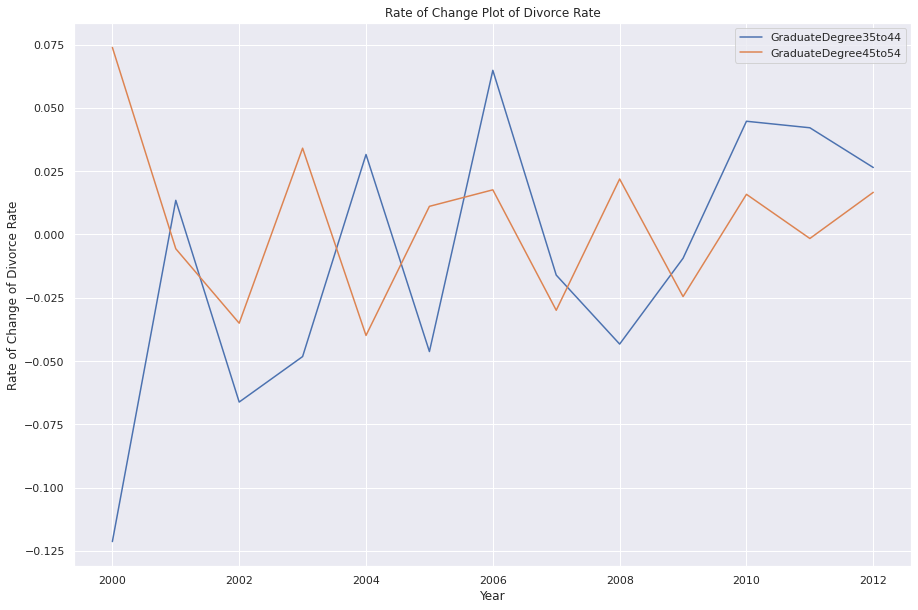

In [ ]:
#Info on Graduate level education begins in 2000, so they are plotted separately
plt.figure(figsize = (15,10))

plt.plot(years, GraduateDegree35to44roc, label = "GraduateDegree35to44")
plt.plot(years, GraduateDegree45to54roc, label = "GraduateDegree45to54")

plt.title('Rate of Change Plot of Divorce Rate')
plt.xlabel('Year')
plt.ylabel('Rate of Change of Divorce Rate')
plt.legend()
plt.show()

##4. Scatter Plot of Y for X

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


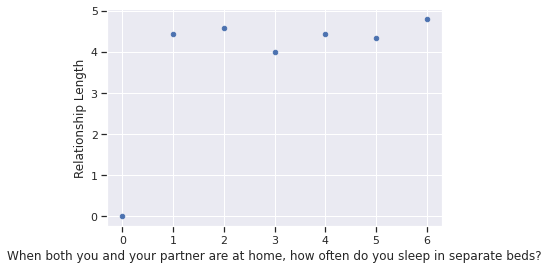

In [ ]:
df_relationship = df_clean.groupby('When both you and your partner are at home, how often do you sleep in separate beds?')

df_relationship2 = df_relationship.mean('When both you and your partner are at home, how often do you sleep in separate beds?')

df_relationship2.reset_index().plot.scatter(x='When both you and your partner are at home, how often do you sleep in separate beds?', y="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.")
plt.ylabel('Relationship Length')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


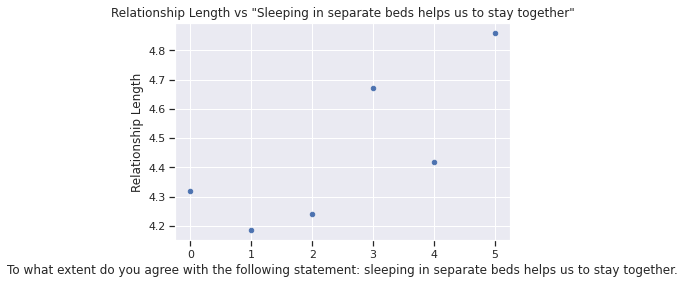

In [ ]:
df_relationship = df_clean.groupby('To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.')

df_relationship2 = df_relationship.mean('To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.')

df_relationship2.reset_index().plot.scatter(x='To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.', y="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.")

plt.title('Relationship Length vs "Sleeping in separate beds helps us to stay together"')
#plt.xlabel('')
plt.ylabel('Relationship Length')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


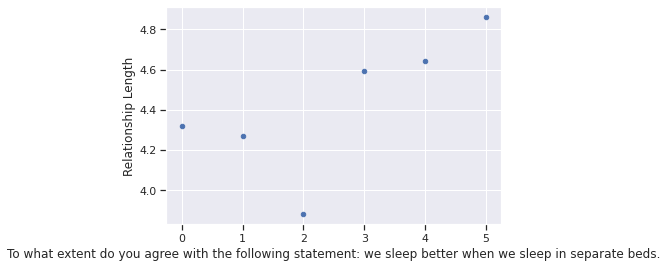

In [ ]:
df_relationship = df_clean.groupby('To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.')

df_relationship2 = df_relationship.mean('To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.')

df_relationship2.reset_index().plot.scatter(x='To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.', y="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.")
plt.ylabel('Relationship Length')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


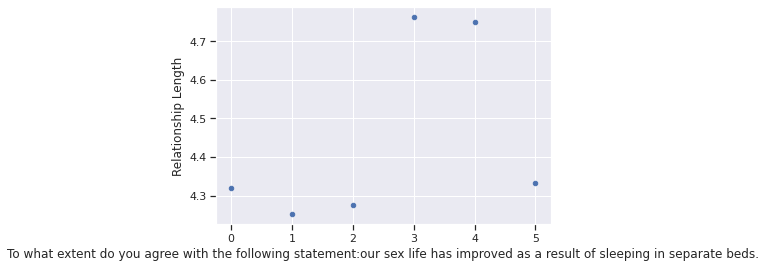

In [ ]:
df_relationship = df_clean.groupby('To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.')

df_relationship2 = df_relationship.mean('To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.')

df_relationship2.reset_index().plot.scatter(x='To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.', y="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.")
plt.ylabel('Relationship Length')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


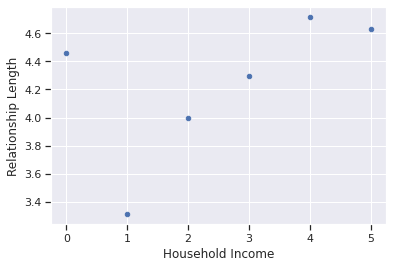

In [ ]:
df_relationship = df_clean.groupby('Household Income')

df_relationship2 = df_relationship.mean('Household Income')

df_relationship2.reset_index().plot.scatter(x="Household Income", y="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.")
plt.ylabel('Relationship Length')
plt.show()

##5. Barchart for Different Xs, and Properties Y

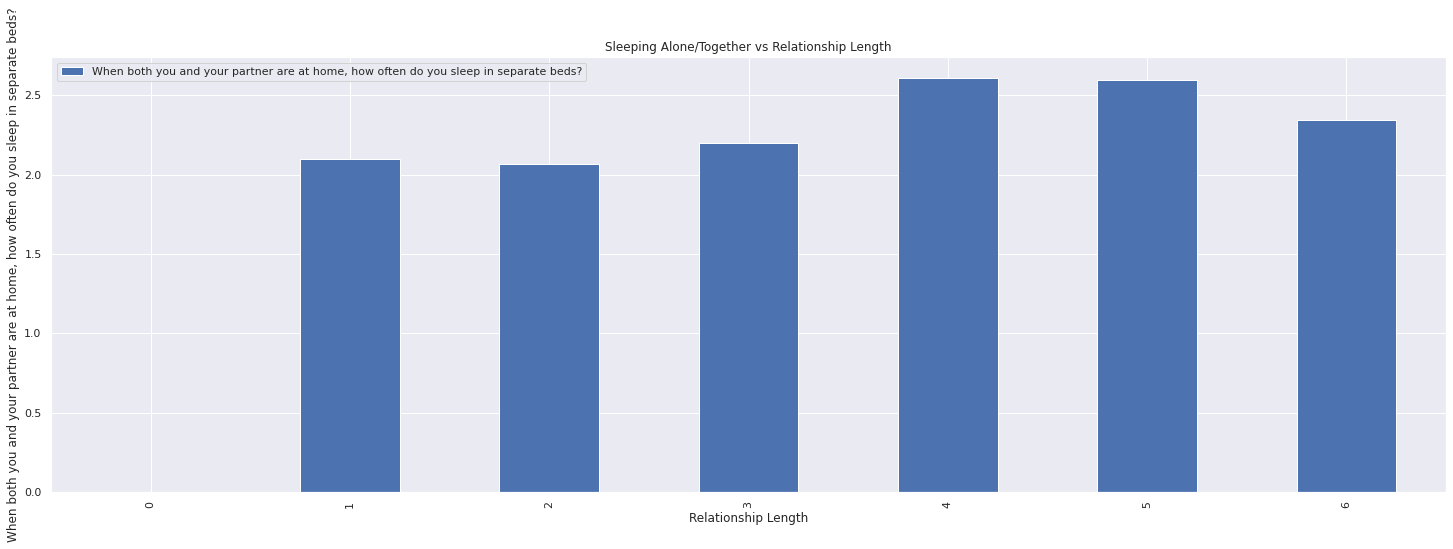

In [ ]:
df_relationship = df_clean.groupby('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2 = df_relationship.mean('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2.plot.bar(y='When both you and your partner are at home, how often do you sleep in separate beds?', figsize = (25,8))
plt.title('Sleeping Alone/Together vs Relationship Length')
plt.xlabel('Relationship Length')
plt.ylabel('When both you and your partner are at home, how often do you sleep in separate beds?')
plt.show()

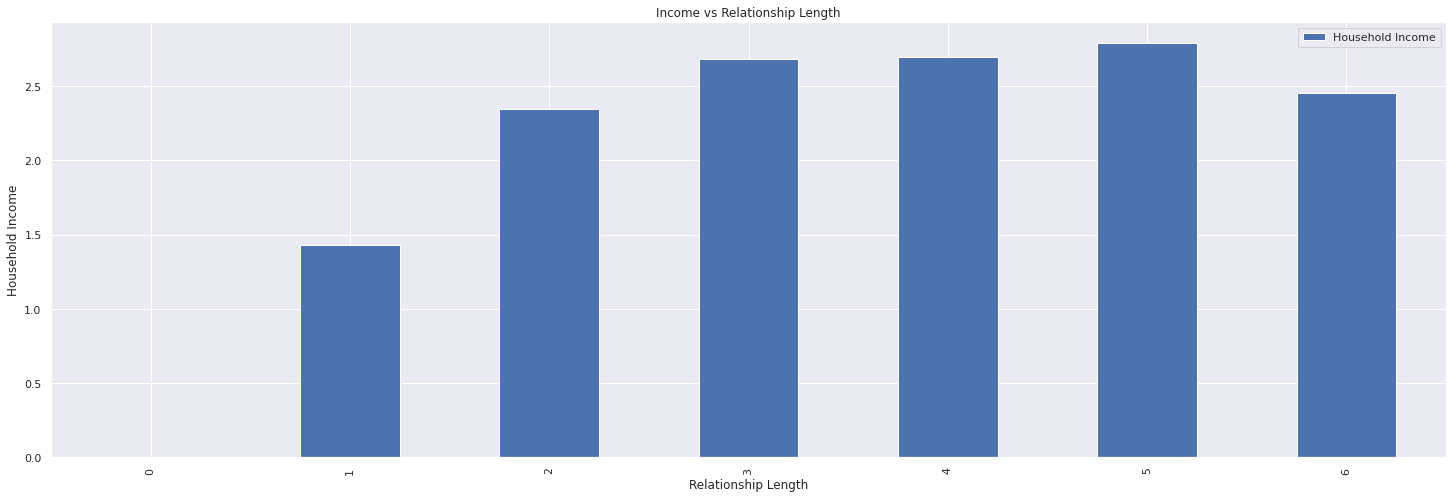

In [ ]:
df_relationship = df_clean.groupby('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2 = df_relationship.mean('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2.plot.bar(y='Household Income', figsize = (25,8))
plt.title('Income vs Relationship Length')
plt.xlabel('Relationship Length')
plt.ylabel('Household Income')
plt.show()

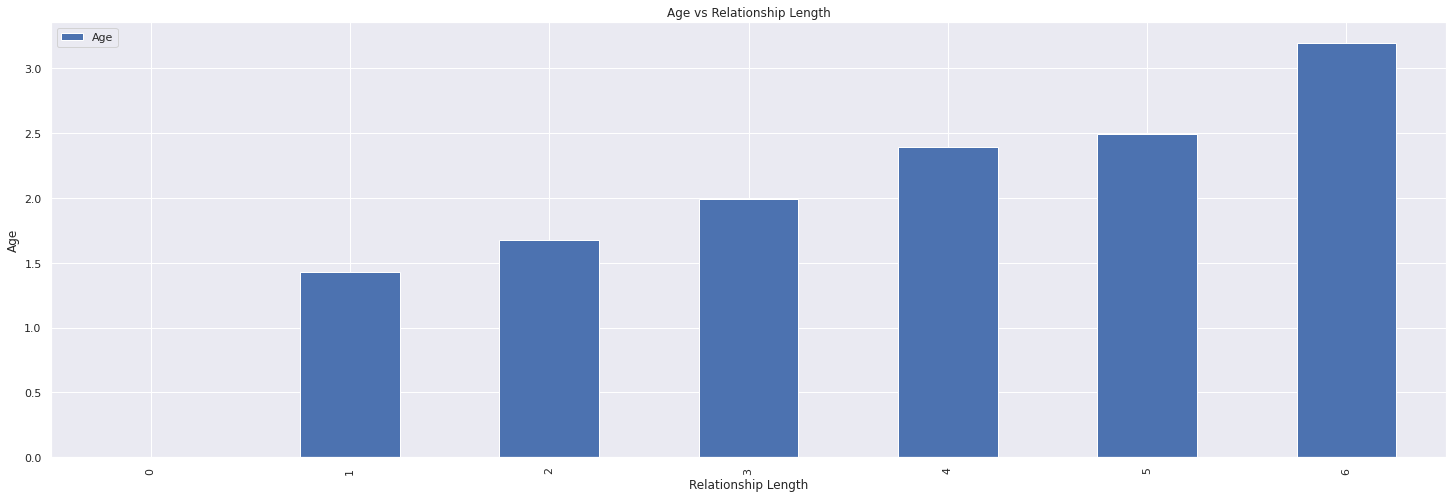

In [ ]:
df_relationship = df_clean.groupby('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2 = df_relationship.mean('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2.plot.bar(y='Age', figsize = (25,8))
plt.title('Age vs Relationship Length')
plt.xlabel('Relationship Length')
plt.ylabel('Age')
plt.show()

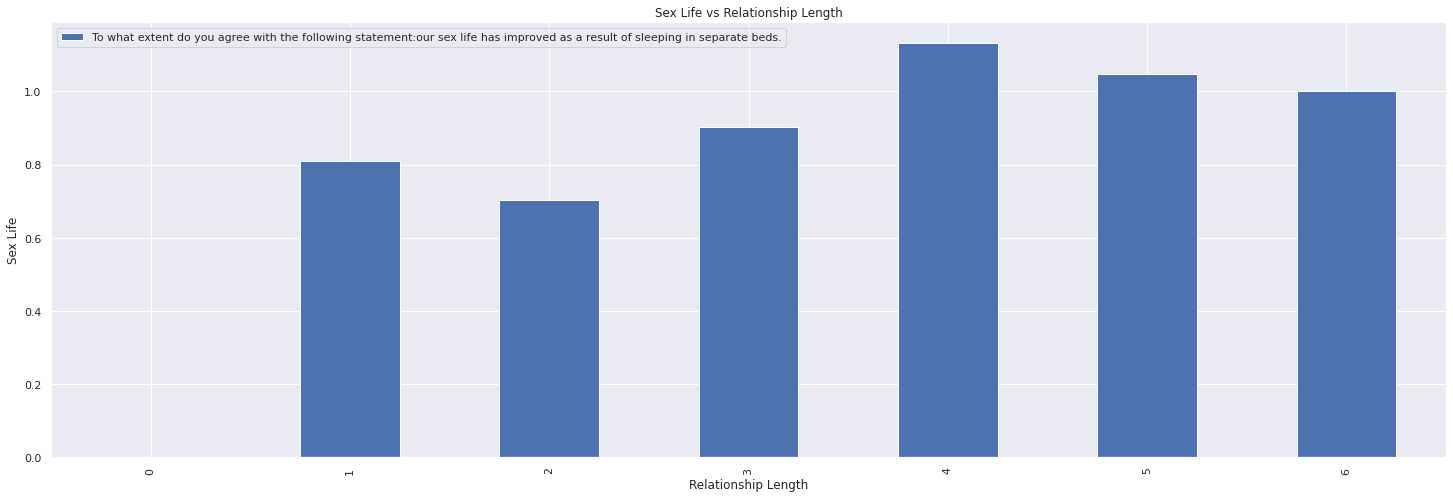

In [ ]:
df_relationship = df_clean.groupby('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2 = df_relationship.mean('How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.')

df_relationship2.plot.bar(y='To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.', figsize = (25,8))
plt.title('Sex Life vs Relationship Length')
plt.xlabel('Relationship Length')
plt.ylabel('Sex Life')
plt.show()

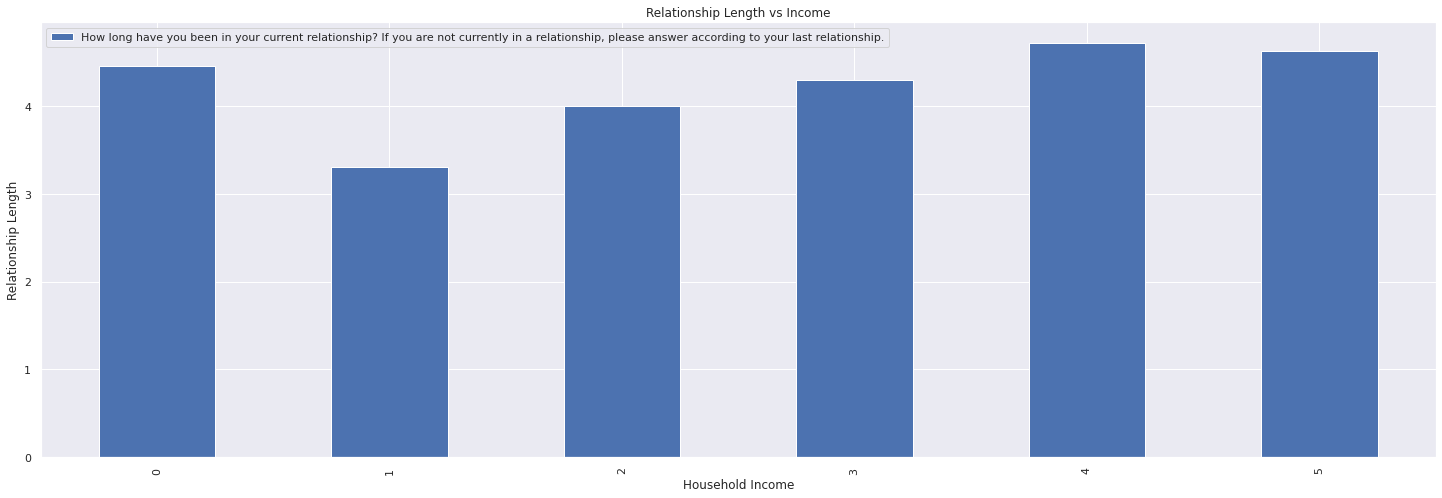

In [ ]:
df_relationship = df_clean.groupby('Household Income')

df_relationship2 = df_relationship.mean('Household Income')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Income')
plt.xlabel('Household Income')
plt.ylabel('Relationship Length')
plt.show()

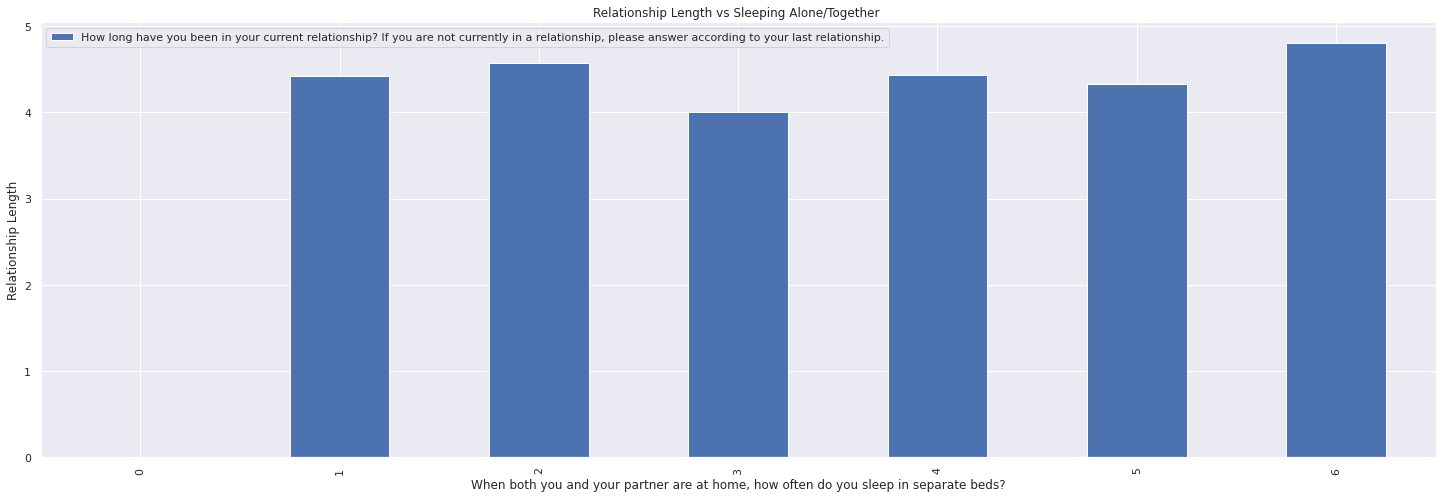

In [ ]:
df_relationship = df_clean.groupby('When both you and your partner are at home, how often do you sleep in separate beds?')

df_relationship2 = df_relationship.mean('When both you and your partner are at home, how often do you sleep in separate beds?')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Sleeping Alone/Together ')
plt.xlabel('When both you and your partner are at home, how often do you sleep in separate beds?')
plt.ylabel('Relationship Length')
plt.show()

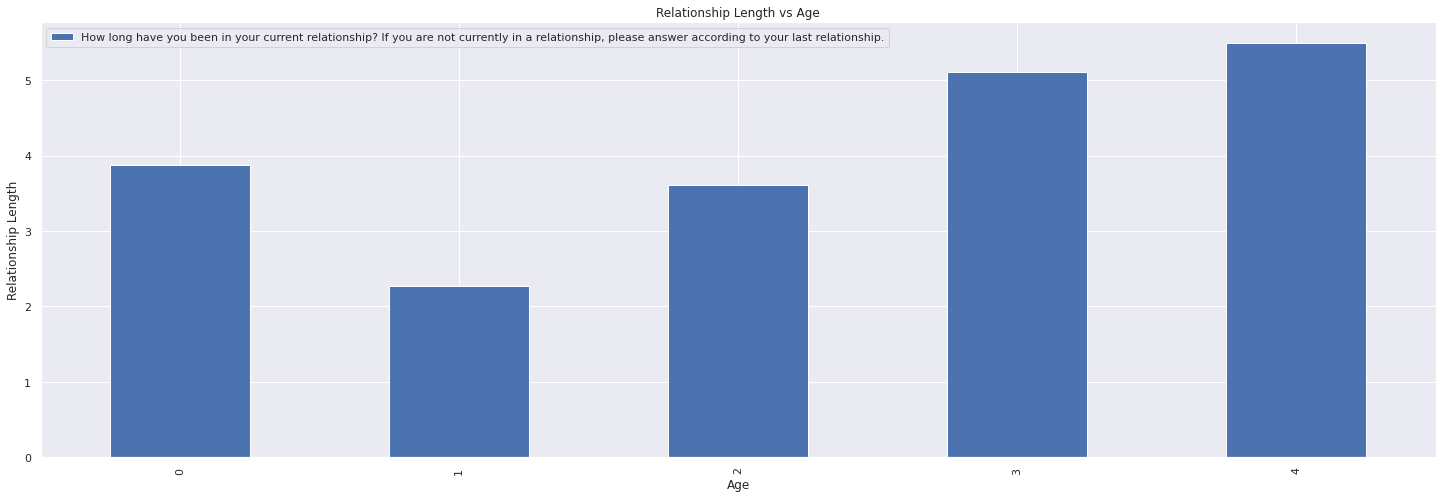

In [ ]:
df_relationship = df_clean.groupby('Age')

df_relationship2 = df_relationship.mean('Age')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Age')
plt.xlabel('Age')
plt.ylabel('Relationship Length')
plt.show()

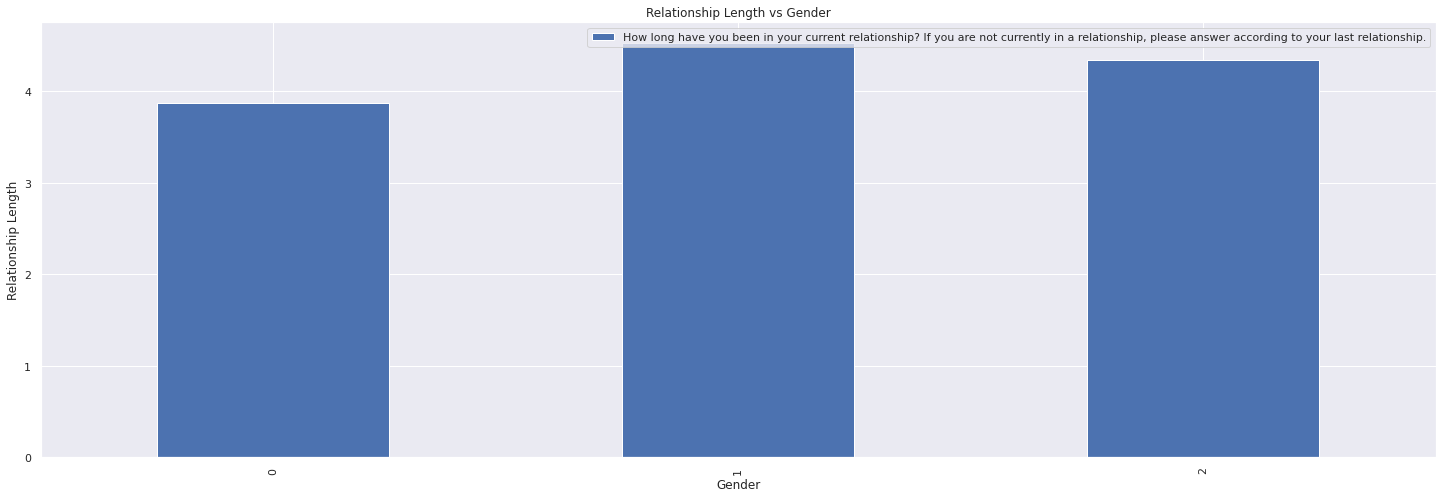

In [ ]:
df_relationship = df_clean.groupby('Gender')

df_relationship2 = df_relationship.mean('Gender')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Gender')
plt.xlabel('Gender')
plt.ylabel('Relationship Length')
plt.show()

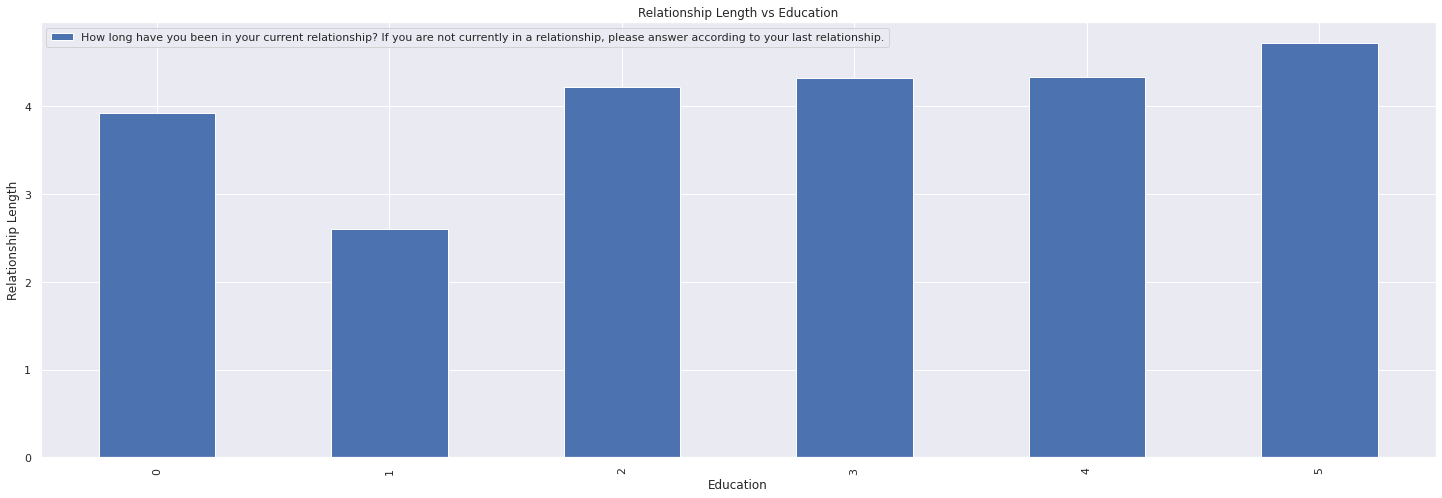

In [ ]:
df_relationship = df_clean.groupby('Education')

df_relationship2 = df_relationship.mean('Education')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Education')
plt.xlabel('Education')
plt.ylabel('Relationship Length')
plt.show()

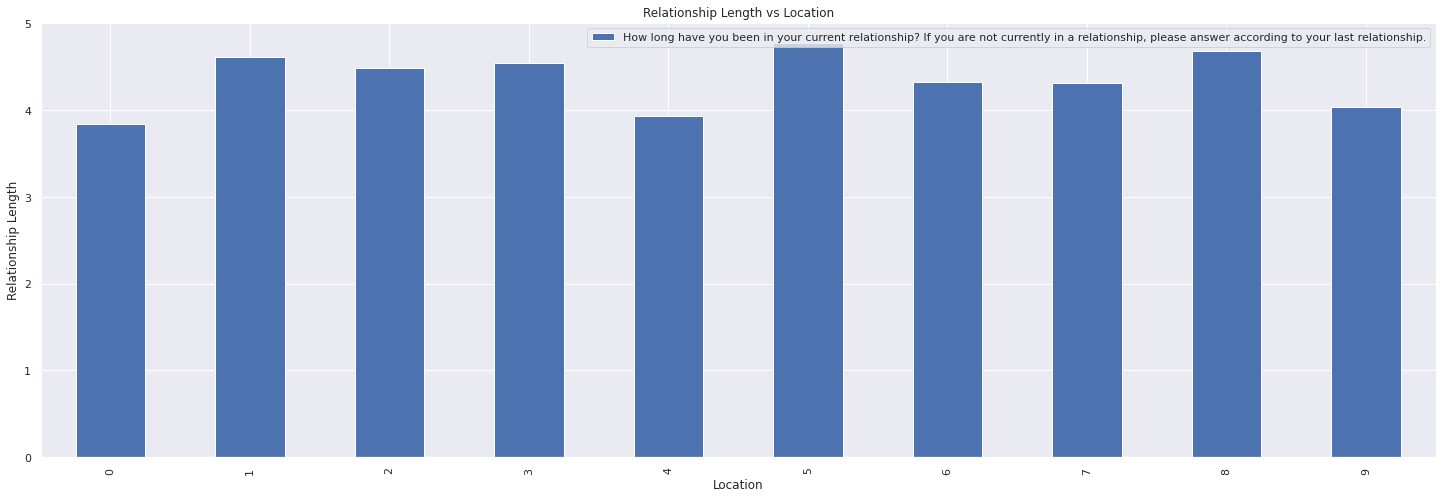

In [ ]:
df_relationship = df_clean.groupby('Location (Census Region)')

df_relationship2 = df_relationship.mean('Location (Census Region)')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Location')
plt.xlabel('Location')
plt.ylabel('Relationship Length')
plt.show()

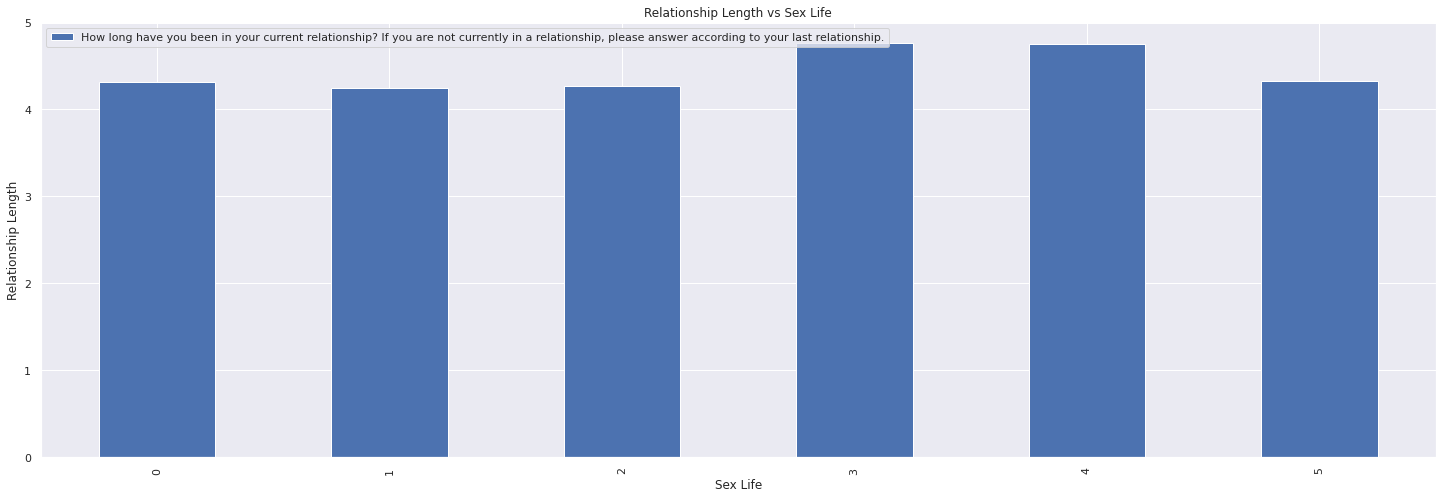

In [ ]:
df_relationship = df_clean.groupby('To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.')

df_relationship2 = df_relationship.mean('To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.title('Relationship Length vs Sex Life')
plt.xlabel('Sex Life')
plt.ylabel('Relationship Length')
plt.show()

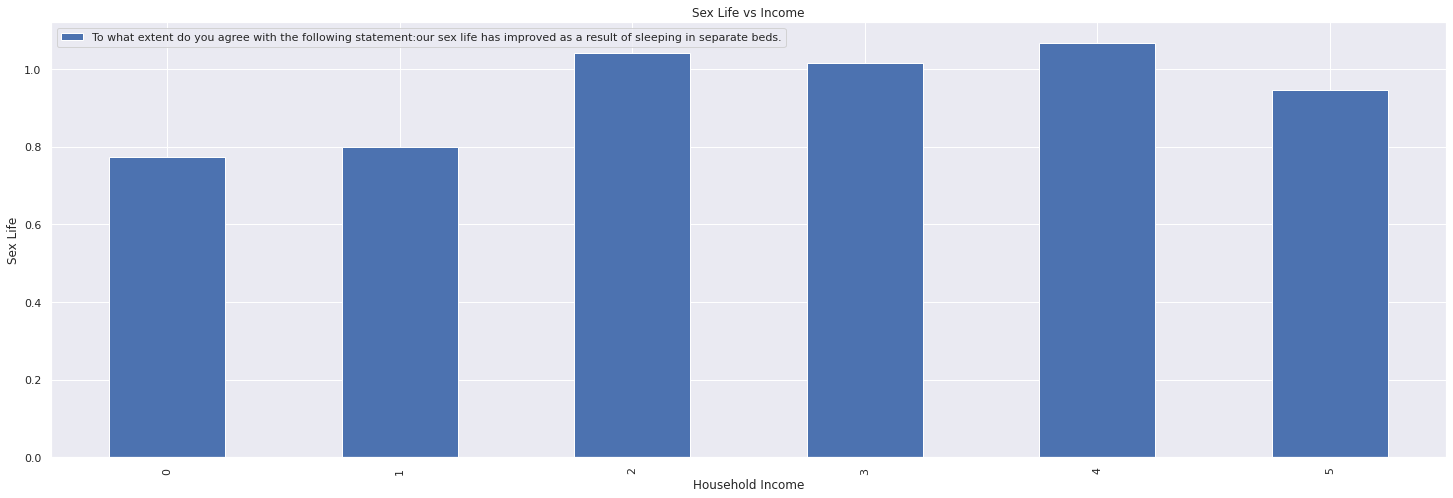

In [ ]:
df_relationship = df_clean.groupby('Household Income')

df_relationship2 = df_relationship.mean('Household Income')

df_relationship2.plot.bar(y='To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.', figsize = (25,8))
plt.title('Sex Life vs Income')
plt.xlabel('Household Income')
plt.ylabel('Sex Life')
plt.show()

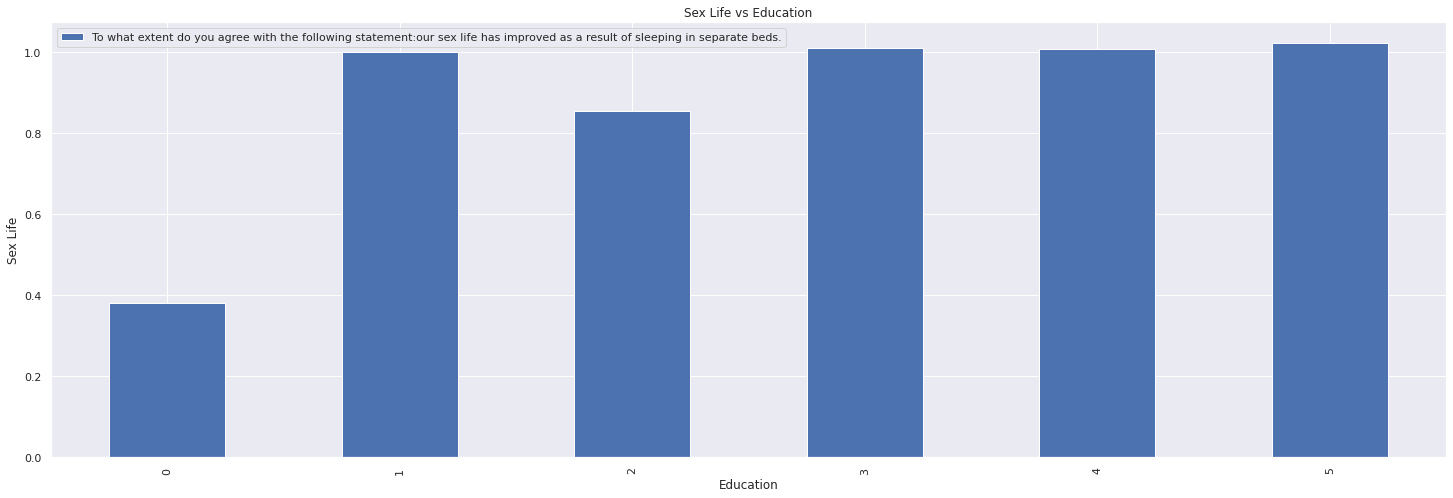

In [ ]:
df_relationship = df_clean.groupby('Education')

df_relationship2 = df_relationship.mean('Education')

df_relationship2.plot.bar(y='To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.', figsize = (25,8))
plt.title('Sex Life vs Education')
plt.xlabel('Education')
plt.ylabel('Sex Life')
plt.show()

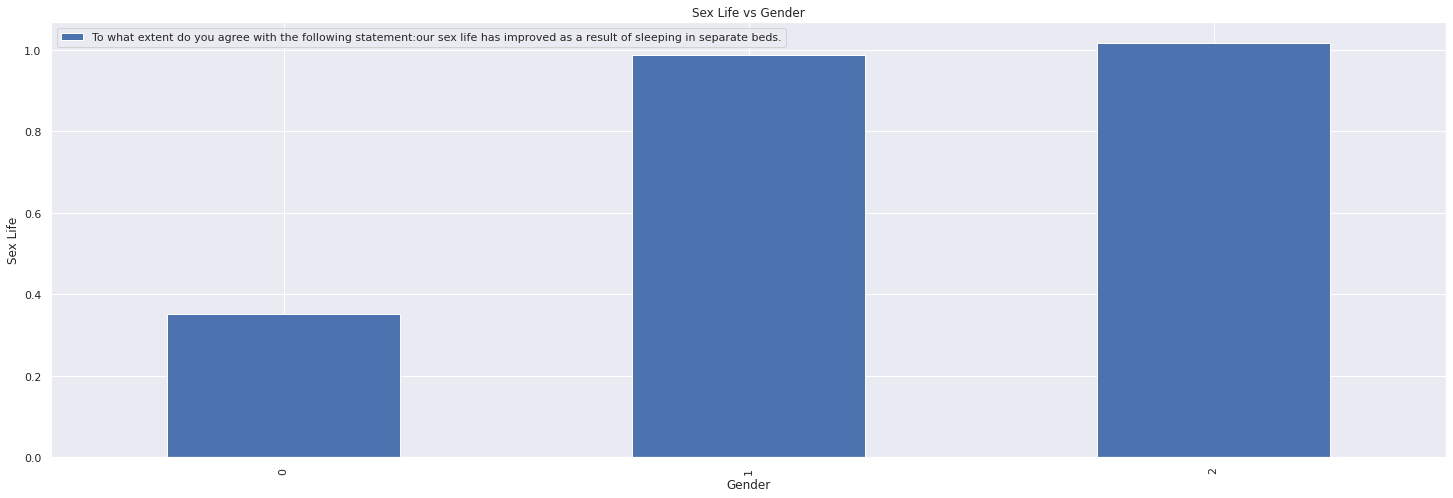

In [ ]:
df_relationship = df_clean.groupby('Gender')

df_relationship2 = df_relationship.mean('Gender')

df_relationship2.plot.bar(y='To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.', figsize = (25,8))
plt.title('Sex Life vs Gender')
plt.xlabel('Gender')
plt.ylabel('Sex Life')
plt.show()

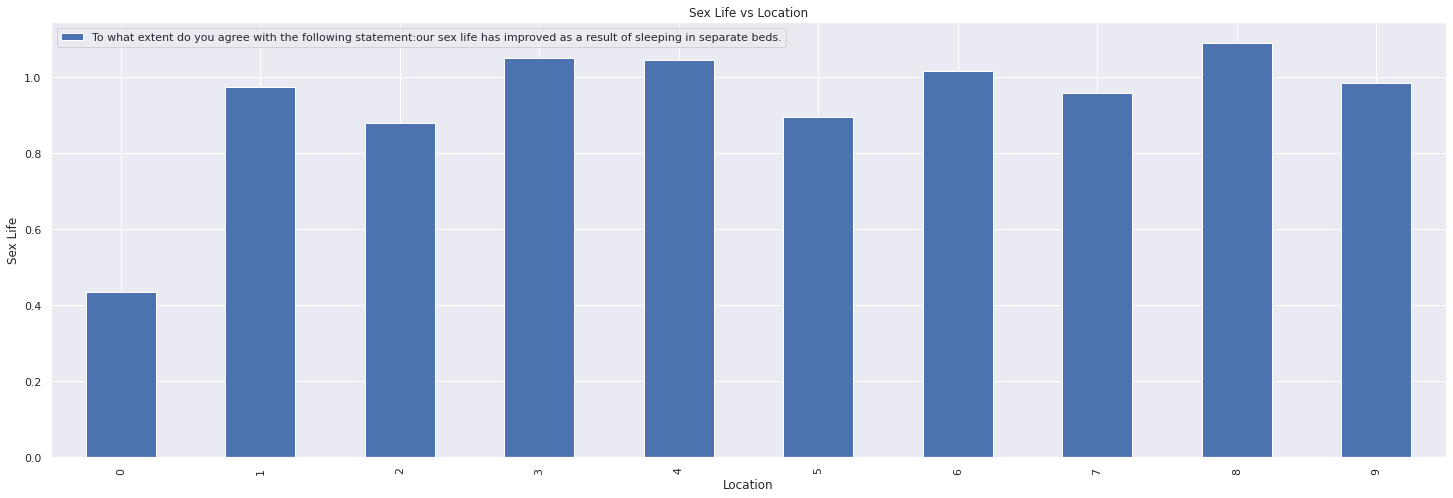

In [ ]:
df_relationship = df_clean.groupby('Location (Census Region)')

df_relationship2 = df_relationship.mean('Location (Census Region)')

df_relationship2.plot.bar(y='To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.', figsize = (25,8))
plt.title('Sex Life vs Location')
plt.xlabel('Location')
plt.ylabel('Sex Life')
plt.show()

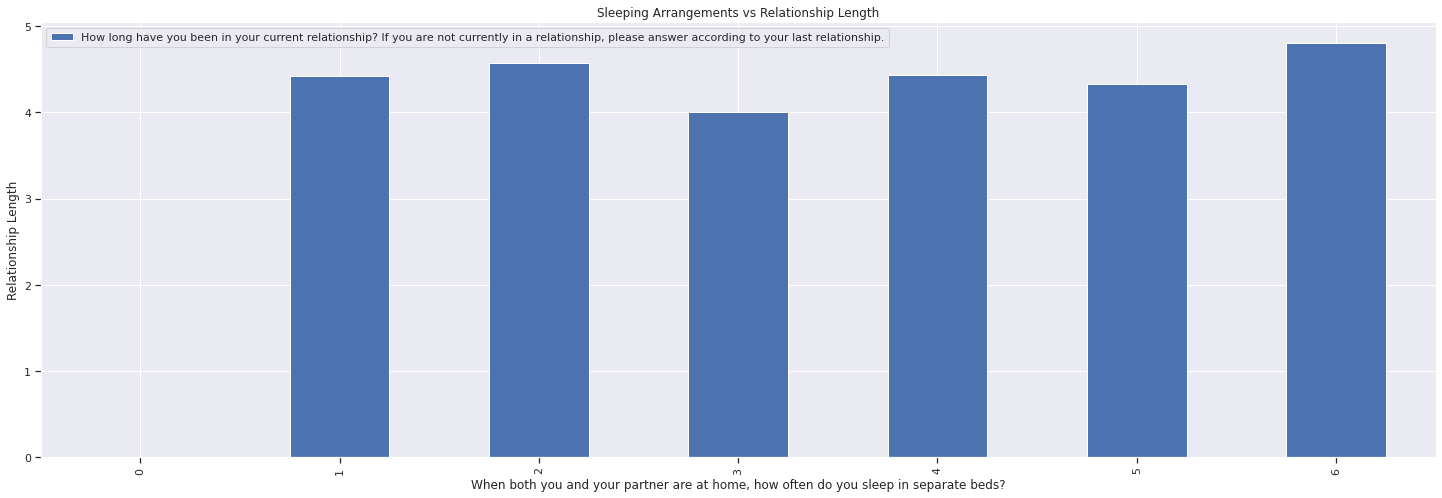

In [ ]:
df_relationship = df_clean.groupby('When both you and your partner are at home, how often do you sleep in separate beds?')

df_relationship2 = df_relationship.mean('When both you and your partner are at home, how often do you sleep in separate beds?')

df_relationship2.plot.bar(y='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))

plt.title('Sleeping Arrangements vs Relationship Length')

plt.ylabel('Relationship Length')
plt.show()

##6. Boxplots of Xs for their Properties Y

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


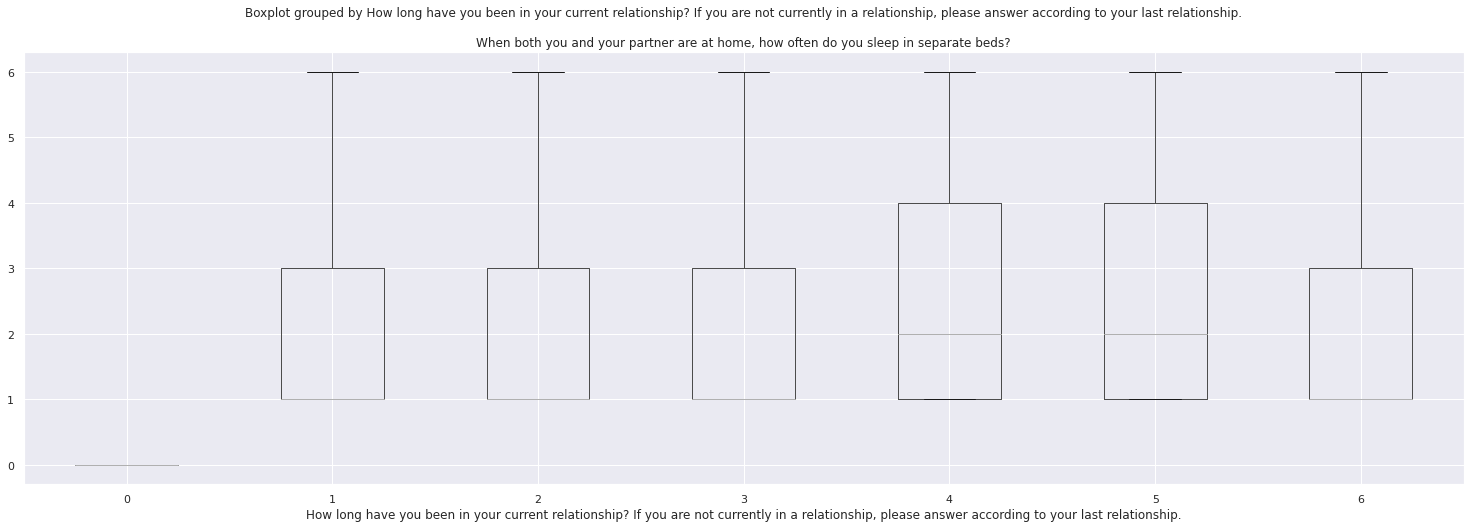

In [ ]:
df_clean.boxplot(column = "When both you and your partner are at home, how often do you sleep in separate beds?", by = 'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


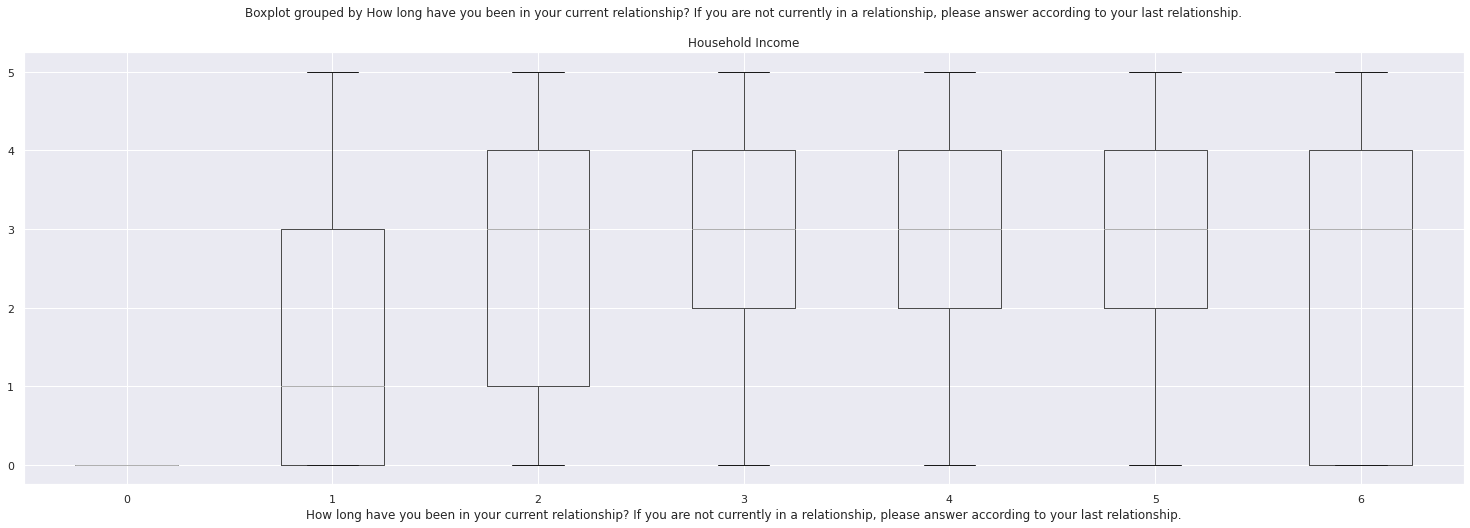

In [ ]:
df_clean.boxplot(column="Household Income", by='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


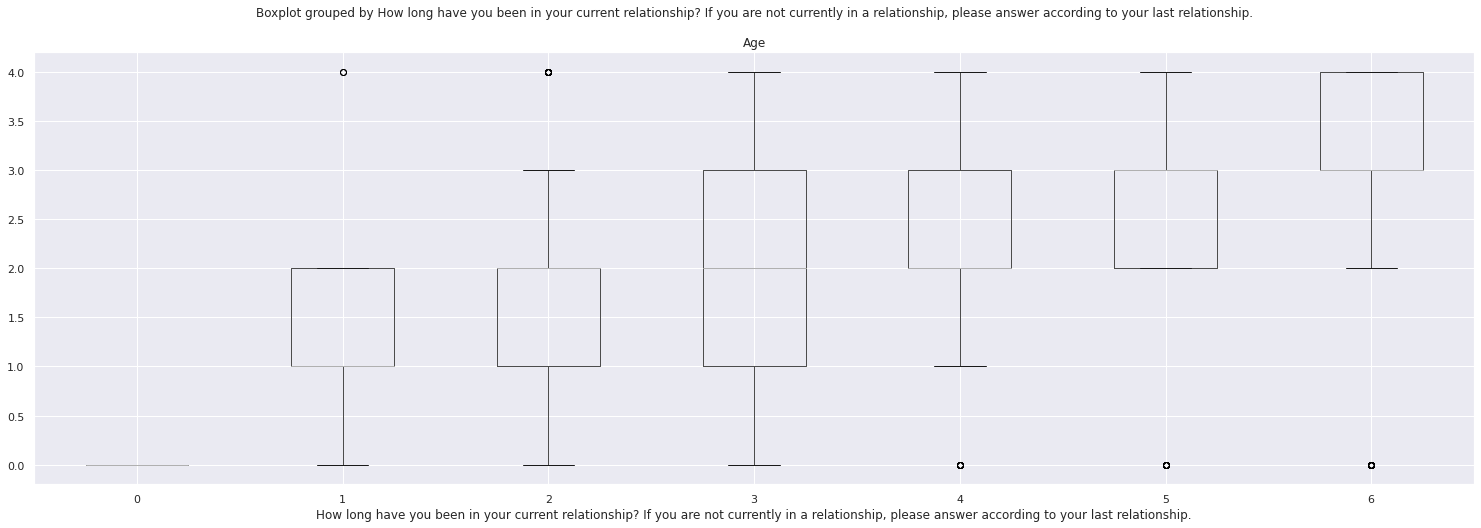

In [ ]:
df_clean.boxplot(column="Age", by='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


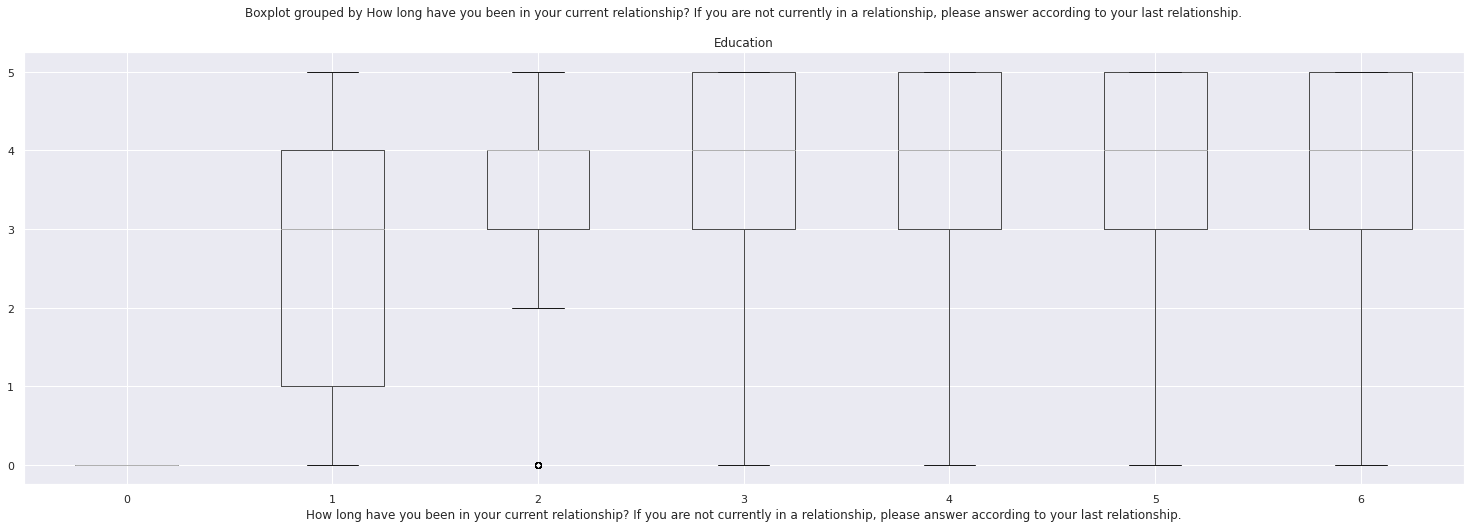

In [ ]:
df_clean.boxplot(column="Education", by='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


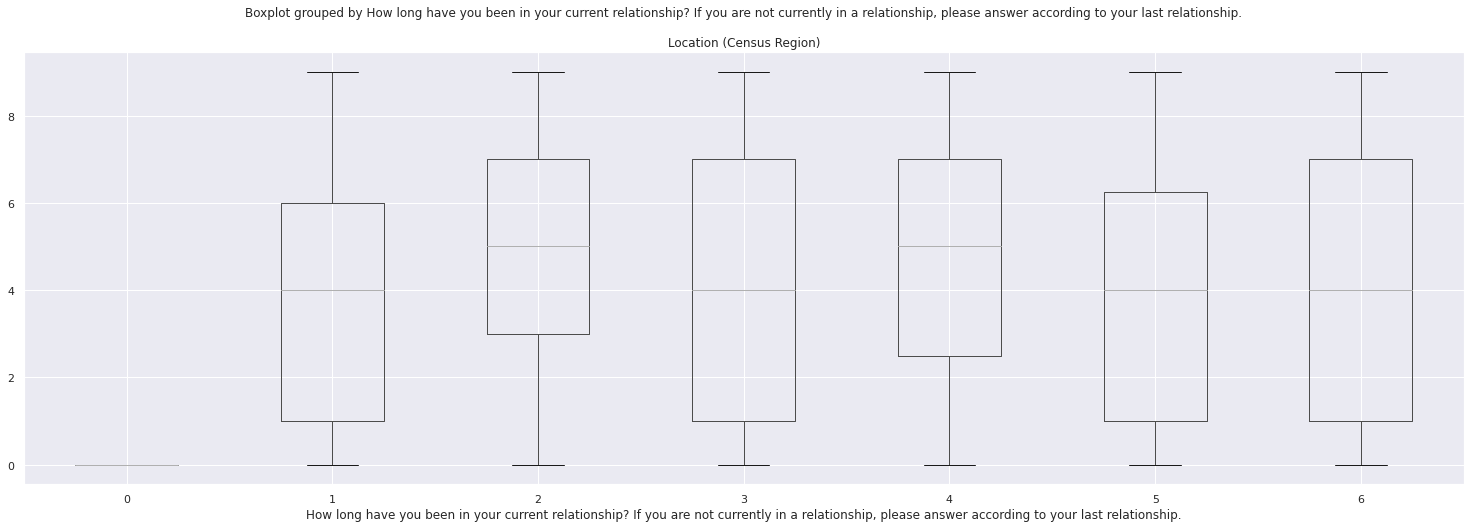

In [ ]:
df_clean.boxplot(column="Location (Census Region)", by='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', figsize = (25,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


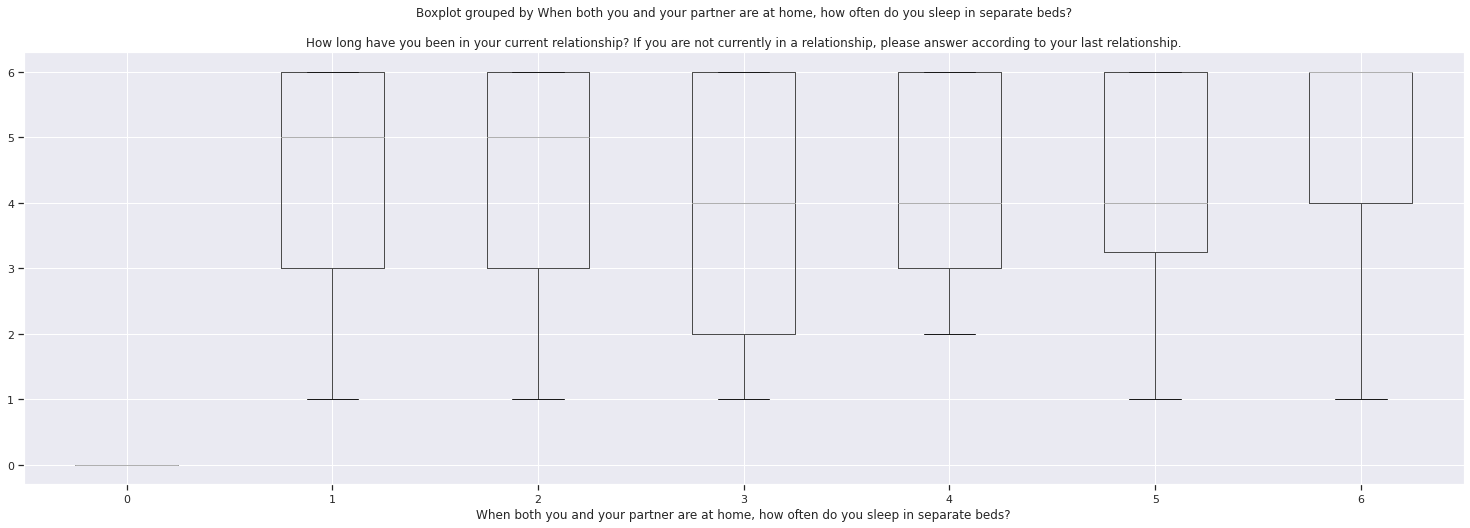

In [ ]:
df_clean.boxplot(column='How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.', by="When both you and your partner are at home, how often do you sleep in separate beds?", figsize = (25,8))
plt.show()

##7. Draw the Histogram of all Y for all X

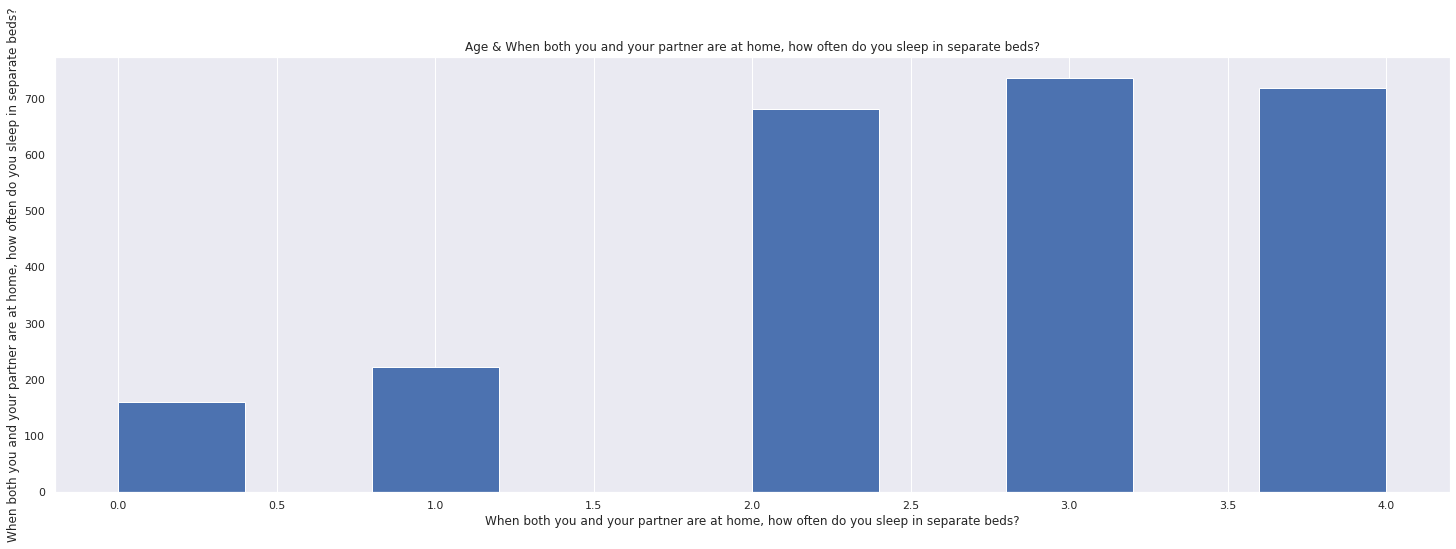

In [ ]:
plt.figure(figsize = (25,8))
plt.hist(df_clean['Age'], weights = df_clean['When both you and your partner are at home, how often do you sleep in separate beds?'])
plt.grid(axis = 'y')
plt.xlabel('When both you and your partner are at home, how often do you sleep in separate beds?')
plt.ylabel('When both you and your partner are at home, how often do you sleep in separate beds?')
plt.title('Age & When both you and your partner are at home, how often do you sleep in separate beds?')
plt.show()

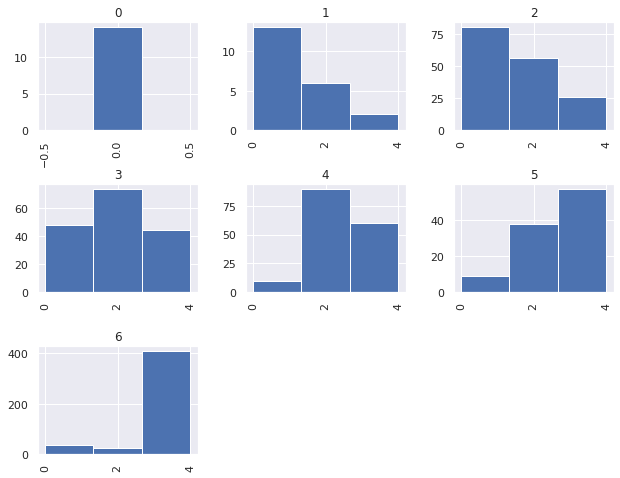

In [ ]:
df_clean.hist(column="Age", by="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.", bins=3, figsize = (10,8))
plt.show()

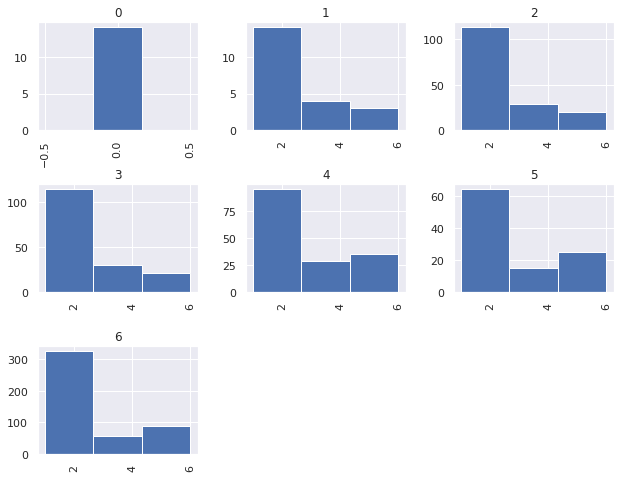

In [ ]:
df_clean.hist(column="When both you and your partner are at home, how often do you sleep in separate beds?", by="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.", bins=3, figsize = (10,8))
plt.show()

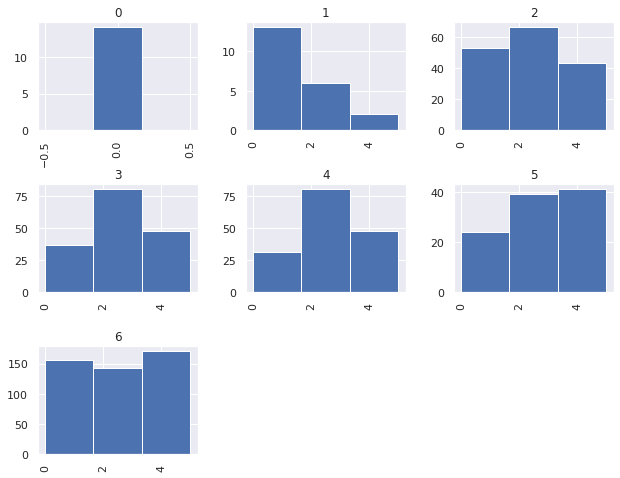

In [ ]:
df_clean.hist(column="Household Income", by="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.", bins=3, figsize = (10,8))
plt.show()

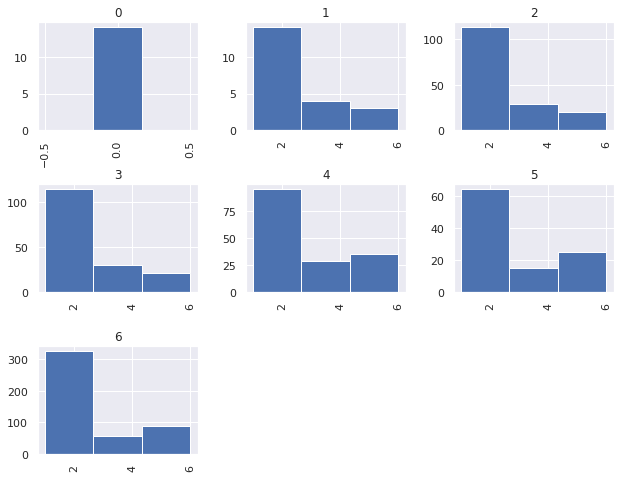

In [ ]:
df_clean.hist(column="When both you and your partner are at home, how often do you sleep in separate beds?", by="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.", bins=3, figsize = (10,8))
plt.show()

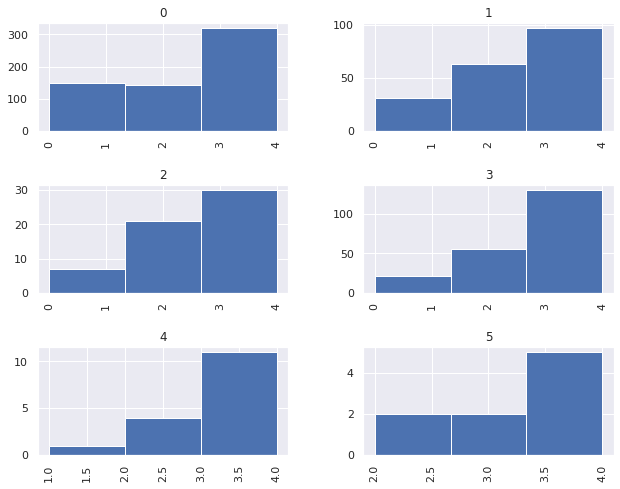

In [ ]:
df_clean.hist(column="Age", by="To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.", bins=3, figsize = (10,8))
plt.show()

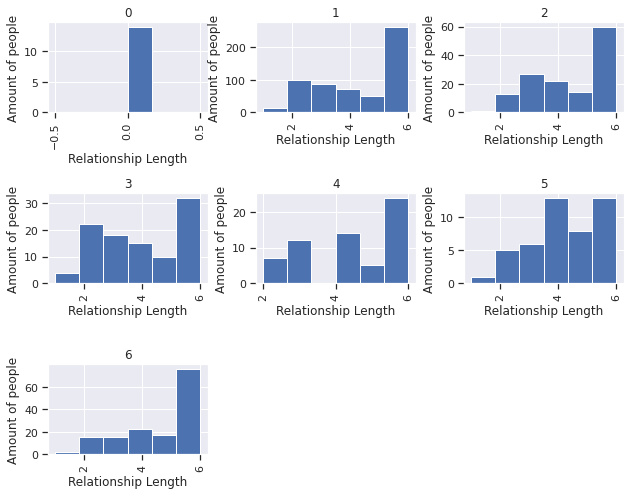

In [ ]:
histogram = df_clean.hist(column="How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.", by="When both you and your partner are at home, how often do you sleep in separate beds?", bins=6, figsize = (10,8))

for ax in histogram.flatten():
    ax.set_xlabel("Relationship Length")
    ax.set_ylabel("Amount of people")
plt.subplots_adjust(hspace=0.9)
plt.show()

##8. Heatmap of Correlations for Y with other Attributes

In [ ]:
df_heatmap = df_clean.drop(['Which of the following best describes your current relationship status?','How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.','Gender','Location (Census Region)','Which of the following best describes your current occupation?'], axis=1)
df_heatmap

,"When both you and your partner are at home, how often do you sleep in separate beds?",When was the first time you slept in separate beds?,To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.,To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.,To what extent do you agree with the following statement:our sex life has improved as a result of sleeping in separate beds.,Age,Household Income,Education
1,2,5,1,4,1,1,1,3
2,4,6,4,5,1,1,0,4
3,1,0,0,0,0,1,5,5
4,1,0,0,0,0,1,2,4
5,1,0,0,0,0,1,4,5
...,...,...,...,...,...,...,...,...
1089,2,5,3,3,3,2,0,4
1090,6,1,3,3,3,4,0,2
1091,1,0,0,0,0,2,5,4
1092,1,0,0,0,0,4,3,3


In [ ]:
corr_matrix = df_heatmap.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True 
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


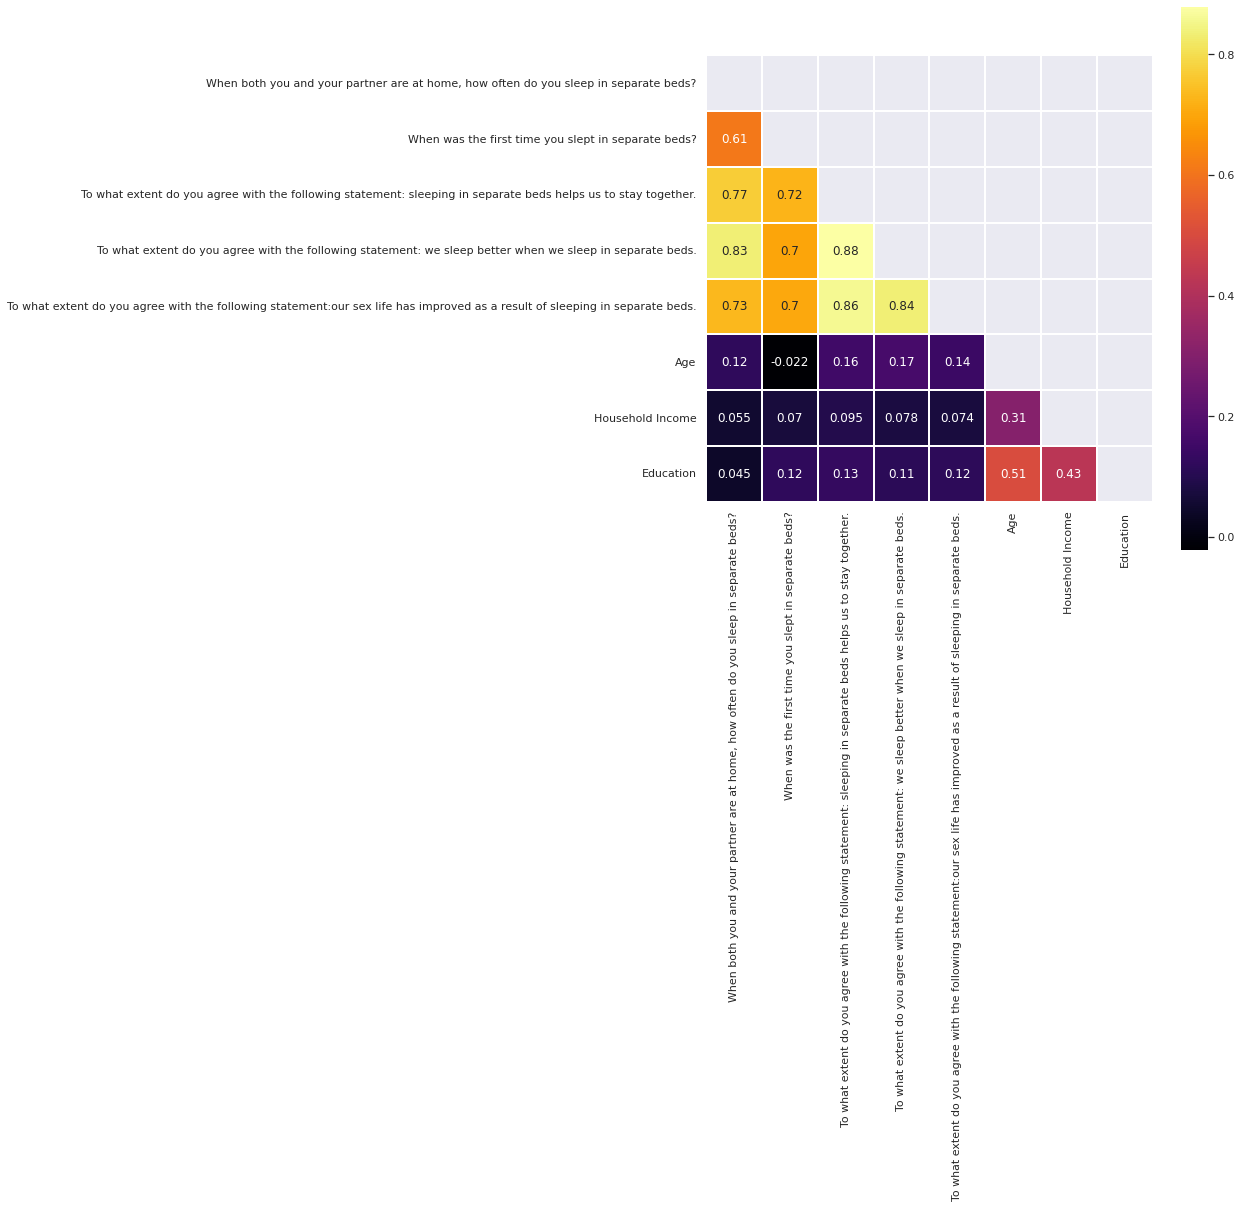

In [ ]:
plt.subplots(figsize = (10, 10))
df_heatmap_final = sns.heatmap(corr_matrix,
                             square = True,
                             linewidths = 1,
                             annot = True,
                             annot_kws = {'size':12},
                             cmap = 'inferno',
                             mask = mask)                 
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.savefig(f"{images_dir}/HM1.png")

In [ ]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
SAD2 = open("SAD2.csv","r")

# X = To what extent do you agree with the following statement: sleeping in separate beds helps us to stay together.
# Y = To what extent do you agree with the following statement: we sleep better when we in separate beds.

# 1 = Strongly Disagree
# 2 - Somewhat Disagree
# 3 - Neither Agree or Disagree
# 4 = Somewhat Agree
# 5 - Strongly Disagree

df_SAD2 = pd.read_csv(SAD2)
df_SAD2.tail()

In [ ]:
df_SAD2.info()

In [ ]:
corr_matrix = df_SAD2.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True 
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True 

In [ ]:
plt.subplots(figsize = (10, 10))
df_heatmap_final2 = sns.heatmap(corr_matrix,
                             square = True,
                             linewidths = 1,
                             annot = True,
                             annot_kws = {'size':12},
                             cmap = 'inferno',
                             mask = mask)                 
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.savefig(f"{images_dir}/HM2.png")

##9. Test Hypothesis: Example: Higher GDP means higher problems/benefits

In [ ]:
df_clean2 = df_clean.copy()

df_clean2.dropna(subset=['Which of the following best describes your current relationship status?'])

df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(2,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(3,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(4,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(5,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(2,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(3,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(4,0)
df_clean2["Which of the following best describes your current relationship status?"] = df_clean2["Which of the following best describes your current relationship status?"].replace(6,0)
# divorce = 1, rest = 0
df_clean2

In [ ]:
X_df = df_clean2.drop(columns = ('Which of the following best describes your current relationship status?'))
X_df.head()

In [ ]:
Y_df = df_clean2['Which of the following best describes your current relationship status?']
Y_df.head()

In [ ]:
df_clean2['Which of the following best describes your current relationship status?'].value_counts()

SPLITTING THE DATASET INTO THREE PARTS - TRAINING DATASET, EVALUATION DATASET, AND TEST DATASET

In [ ]:
X_train_eval, X_test, Y_train_eval, Y_test = train_test_split(X_df, Y_df, test_size = 0.1, random_state = 1, stratify = Y_df)

In [ ]:
X_train, X_eval, Y_train, Y_eval = train_test_split(X_train_eval, Y_train_eval, test_size = 0.25, random_state = 1, stratify = Y_train_eval)

In [ ]:
X_train.shape, X_eval.shape, Y_train.shape, Y_eval.shape, X_test.shape, Y_test.shape

Synthetic Minority Oversampling Technique - SMOTE

In [ ]:
tree_entropyFUTURE = DecisionTreeClassifier(criterion = 'entropy') 
tree_entropyFUTURE.fit(X_train, Y_train)
feature_importance = tree_entropyFUTURE.feature_importances_
print(feature_importance)
# SMOTE ruins feature importance, so we are going back to this part of the code before using SMOTE and see the multiple Full Decision Trees

In [ ]:
print(f'''Shape of X before SMOTE: {X_train.shape}''')

In [ ]:
sm = SMOTE(random_state = 42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
print(f'''Shape of X after SMOTE: {X_train.shape}''')
print('\nBalance of positive and negative classes (%):')
Y_train.value_counts(normalize = True) * 100

FULL DECISION TREE (DT)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive'

In [ ]:
tree_entropy = DecisionTreeClassifier(criterion = 'entropy')
tree_entropy.fit(X_train, Y_train)
fig = plt.figure(figsize = (8,8),dpi=1200)
chart = tree.plot_tree(tree_entropy, feature_names = X_df.columns, class_names = Y_df.name, filled = True)
plt.savefig(f"{images_dir}/FullDT.png")

In [ ]:
tree_entropy.score(X_test, Y_test)

DECISION TREE #2 - MAX_DEPTH = 4 & MIN_SAMPLES_LEAF = 5

In [ ]:
tree_entropy45 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5, criterion = 'entropy')
tree_entropy45.fit(X_train, Y_train)
fig = plt.figure(figsize = (4, 4),dpi=1200)
chart = tree.plot_tree(tree_entropy45, feature_names = X_df.columns, class_names = Y_df.name, filled = True)
plt.savefig(f"{images_dir}/45DT.png")

In [ ]:
tree_entropy45.score(X_test, Y_test)

USING DT TO PREDICT CLASS LABEL (USING FULL DT)

In [ ]:
Y_predict = tree_entropy.predict(X_test)
Y_predict_p = tree_entropy.predict_proba(X_test)
test_df = pd.DataFrame(X_test, columns = X_df.columns)
test_df['class'] = Y_test
test_df['pre'] = Y_predict
test_df['error'] = np.where(test_df['class'] != test_df['pre'], 1, 0)
p = pd.DataFrame(Y_predict_p, index=test_df.index, columns = tree_entropy.classes_)
p.head()

In [ ]:
test_df = test_df.join(p)

for i in test_df.index:
    c = test_df.loc[i, 'pre']
    test_df.loc[i, 'p_score'] = test_df.loc[i, c]

test_df.head(10)

CONFUSION MATRIX

In [ ]:
confusion_matrix(Y_test, Y_predict) 

PRECISION SCORE

In [ ]:
p0 = precision_score(Y_test, Y_predict, labels = [0], average = None)
p1 = precision_score(Y_test, Y_predict, labels = [1], average = None)

print(f"class 0 precision = {p0}\n\
class 1 precision = {p1}")

ACCURACY SCORE

In [ ]:
a0 = accuracy_score(Y_test, Y_predict, normalize = True)

print(f"overall accuracy = {a0}")

RECALL SCORE

In [ ]:
r0 = recall_score(Y_test, Y_predict, labels = [0], average = None)
r1 = recall_score(Y_test, Y_predict, labels = [1], average = None)

print(f"class 0 recall = {r0}\n\
class 1 recall = {r1}")

DECISION TREE #2 - TOP 6 CHI-SQUARED

In [ ]:
Y = df_clean2.iloc[:, 0:1]
Y.head()

In [ ]:
Telco_C={}
Telco_C['feature_names'] = df_clean2.columns.values
Telco_C['data'] = df_clean2.values
Telco_C['target_names'] = Y['Which of the following best describes your current relationship status?'].unique()
Telco_C['target'] = Y['Which of the following best describes your current relationship status?'].values

In [ ]:
chi_selector = SelectKBest(chi2,k=7)
Telco_C['new_data_chi'] = chi_selector.fit_transform(Telco_C['data'], Telco_C['target'])
mask = chi_selector.get_support()
Telco_C['new_feature_names_chi'] = Telco_C['feature_names'][mask]
Telco_C['new_data_chi'].shape

In [ ]:
Telco_C['new_feature_names_chi'] # top six excluding the class label

In [ ]:
X2_df = df_clean2[['How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       'When was the first time you slept in separate beds?',
       'To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.',
       'Which of the following best describes your current occupation?',
       'Age', 'Location (Census Region)']]
X2_df.head()

In [ ]:
Y2_df = df_clean2['Which of the following best describes your current relationship status?']
Y2_df.head()

In [ ]:
X2_train_eval, X2_test, Y2_train_eval, Y2_test = train_test_split(X2_df, Y2_df, test_size = 0.1, random_state = 1, stratify = Y2_df)

In [ ]:
X2_train, X2_eval, Y2_train, Y2_eval = train_test_split(X2_train_eval, Y2_train_eval, test_size = 0.25, random_state = 1, stratify = Y2_train_eval)

In [ ]:
X2_train, Y2_train = sm.fit_resample(X2_train, Y2_train)

In [ ]:
tree_entropy2 = DecisionTreeClassifier(criterion = 'entropy')
tree_entropy2.fit(X2_train, Y2_train)
fig = plt.figure(figsize = (8, 8),dpi=1200)
chart = tree.plot_tree(tree_entropy2, feature_names = X2_df.columns, class_names = Y2_df.name, filled = True)
plt.savefig(f"{images_dir}/ChiDT.png")

In [ ]:
tree_entropy2.score(X2_test, Y2_test)

DECISION TREE #3 - DROPPING 2 FROM CHI-SQUARED

In [ ]:
X3_df = df_clean2[['How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       'When was the first time you slept in separate beds?', # you can comment this
       'To what extent do you agree with the following statement: we sleep better when we sleep in separate beds.', # you can comment this
       'Which of the following best describes your current occupation?']] # top 2 with a random other 2
X3_df.head()

In [ ]:
Y3_df = df_clean2['Which of the following best describes your current relationship status?']
Y3_df.head()

In [ ]:
X3_train_eval, X3_test, Y3_train_eval, Y3_test = train_test_split(X3_df, Y3_df, test_size = 0.1, random_state = 1, stratify = Y3_df)

In [ ]:
X3_train, X3_eval, Y3_train, Y3_eval = train_test_split(X3_train_eval, Y3_train_eval, test_size = 0.25, random_state = 1, stratify = Y3_train_eval)

In [ ]:
X3_train, Y3_train = sm.fit_resample(X3_train, Y3_train)

In [ ]:
tree_entropy3 = DecisionTreeClassifier(criterion = 'entropy')
tree_entropy3.fit(X3_train, Y3_train)
fig = plt.figure(figsize = (8, 8),dpi=1200)
chart = tree.plot_tree(tree_entropy3, feature_names = X3_df.columns, class_names = Y3_df.name, filled = True)
plt.savefig(f"{images_dir}/Chi2DT.png")

In [ ]:
tree_entropy3.score(X3_test, Y3_test)

##10. Any other interesting plots you may think of -- on FINC.ipynb